# ==============EVALUATION PROJECT#8==============

# 1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# DESCRIPTION

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia

# Dataset Description:

- Number of columns: 23


- Date  - The date of observation

- Location  -The common name of the location of the weather station

- MinTemp  -The minimum temperature in degrees celsius

- MaxTemp -The maximum temperature in degrees celsius

- Rainfall  -The amount of rainfall recorded for the day in mm

- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

- Sunshine  -The number of hours of bright sunshine in the day.

- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

- WindDir9am -Direction of the wind at 9am

- WindDir3pm -Direction of the wind at 3pm

- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

- Humidity9am -Humidity (percent) at 9am

- Humidity3pm -Humidity (percent) at 3pm

- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

- Cloud9am - Fraction of sky obscured by cloud at 9am. 

- Cloud3pm -Fraction of sky obscured by cloud 

- Temp9am-Temperature (degrees C) at 9am

- Temp3pm -Temperature (degrees C) at 3pm

- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms
#Import zscore
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# ANALYSING THE RAW DATA

In [3]:
df.shape

(8425, 23)

total 8425 rows and 23 columns

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#checking the datatype
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

total 7 object columns and 16 numerical columns are present

In [6]:
#separates features into categorical and numerical column
num_col = []
cat_col = []
for i in df.dtypes.index:
        if df.dtypes[i]=='object':
            cat_col.append(i)
        else:
            num_col.append(i)

In [7]:
#checking numerical columns
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [8]:
#checking categorical columns
cat_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [9]:
#checking the unique value
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [10]:
#checking the null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [11]:
#checking the null values in percentage
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

#dataset contains huge number of missing values

<AxesSubplot:>

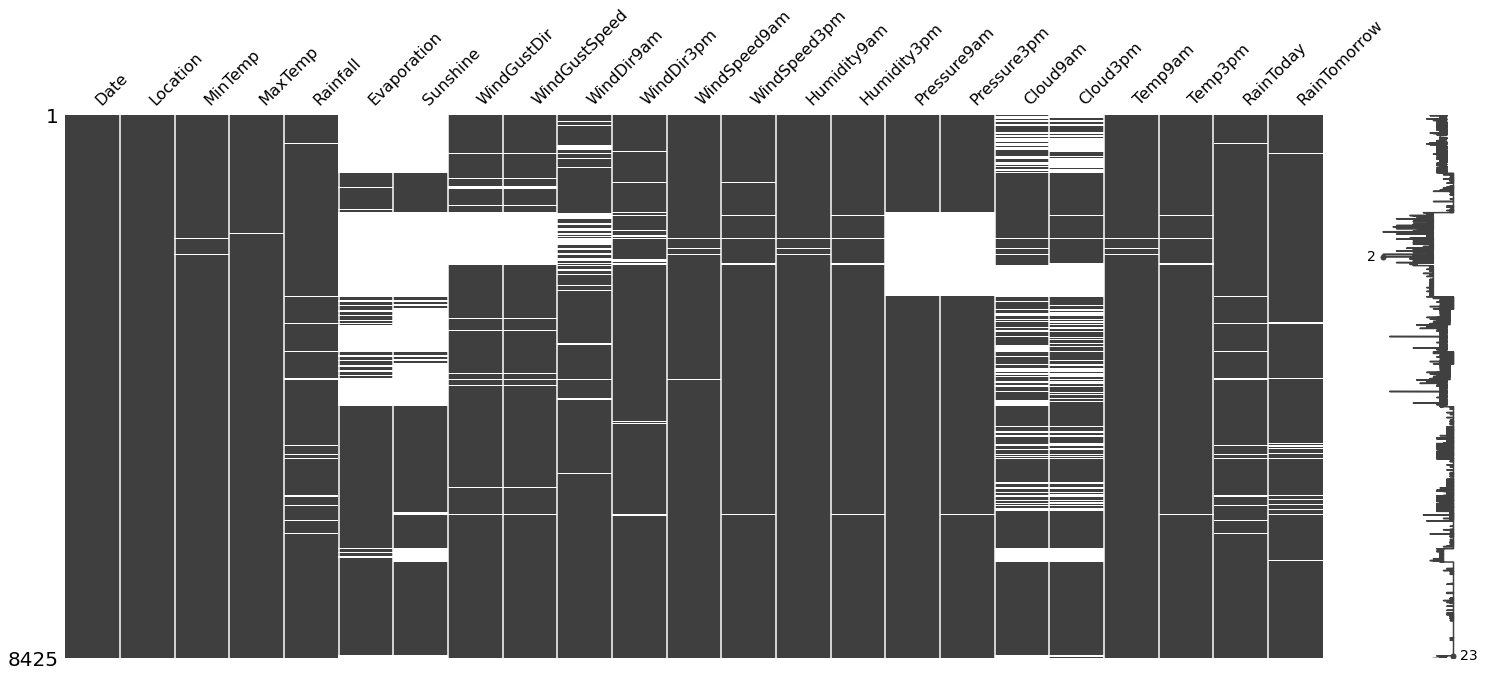

In [12]:
#plotting missing number configuration
ms.matrix(df)

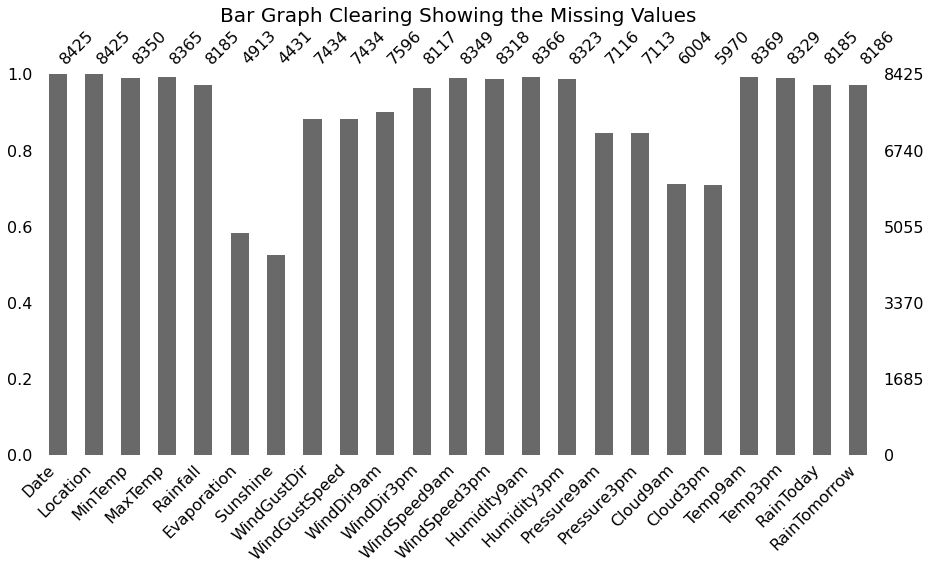

In [13]:
ms.bar(df,figsize=(15,7))
plt.title('Bar Graph Clearing Showing the Missing Values',size=20);

Above plot clearly showing the missing values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [15]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


observation:
-    There is a huge jump in the value of rainfall and evaporation from 75% to Max values which is the concern.
-    standard devaition is more than mean in the column of rainfall which not justify .
-    Huge number of missing values is observed.  

# FEATURE ENGINEERING

In [16]:
#SPLIT DATE FORMAT IN DATE/MONTH/YEAR
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [17]:
#dropping the date column now
df = df.drop(['Date'],axis=1)

In [18]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


# Now treating null values

In [19]:
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())

df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df["MaxTemp"].fillna(df['MaxTemp'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

# For Categorical column mode is preferred

In [20]:
cat_col = [
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [21]:
df[cat_col].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [22]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [23]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

All nullvalues are successfully filled up with proper number

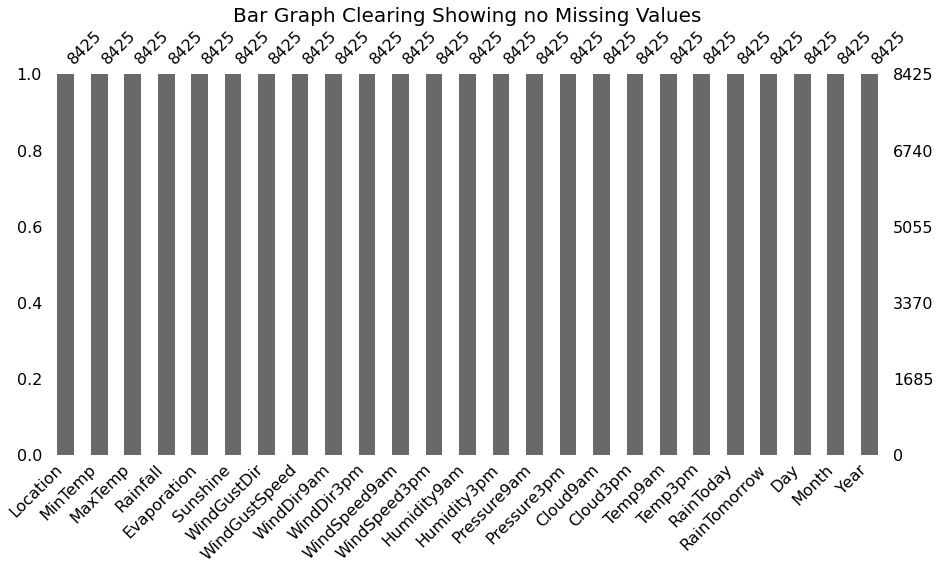

In [24]:
ms.bar(df,figsize=(15,7))
plt.title('Bar Graph Clearing Showing no Missing Values',size=20);

All nullvalues are successfully filled up with proper number

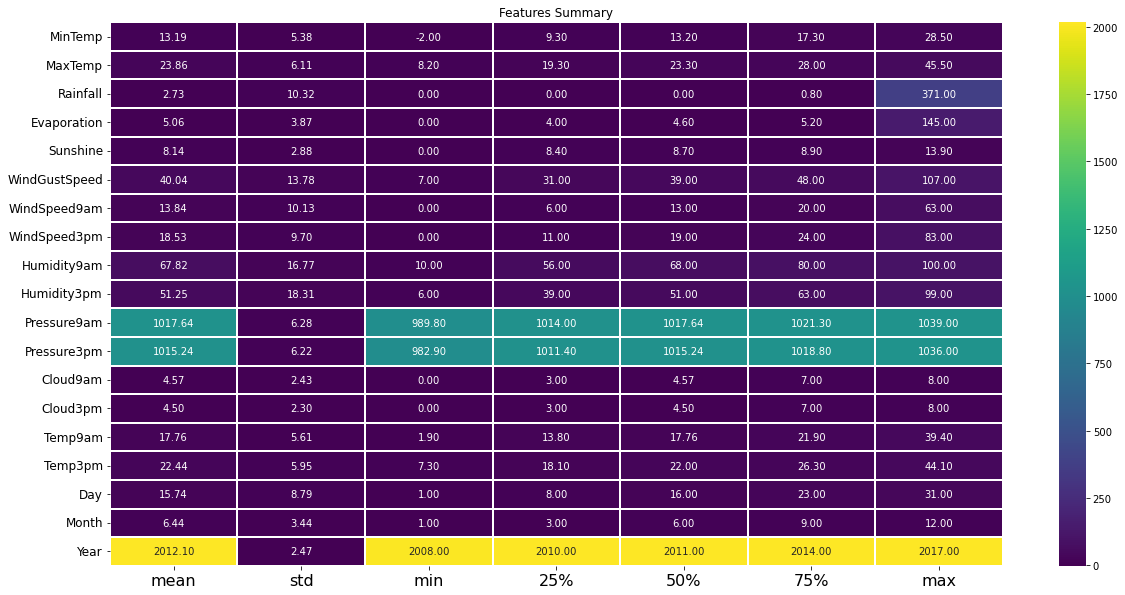

In [25]:
#Heatmap of describe function
plt.figure(figsize = (20,10))
sns.heatmap(round(df.describe()[1:].transpose(), 2), linewidth = 2, annot = True, fmt = '.2f', cmap = 'viridis')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 12)
plt.title('Features Summary')
plt.show();

# EXPLORATORY DATA ANALYSIS

# Checking distribution of numerical columns

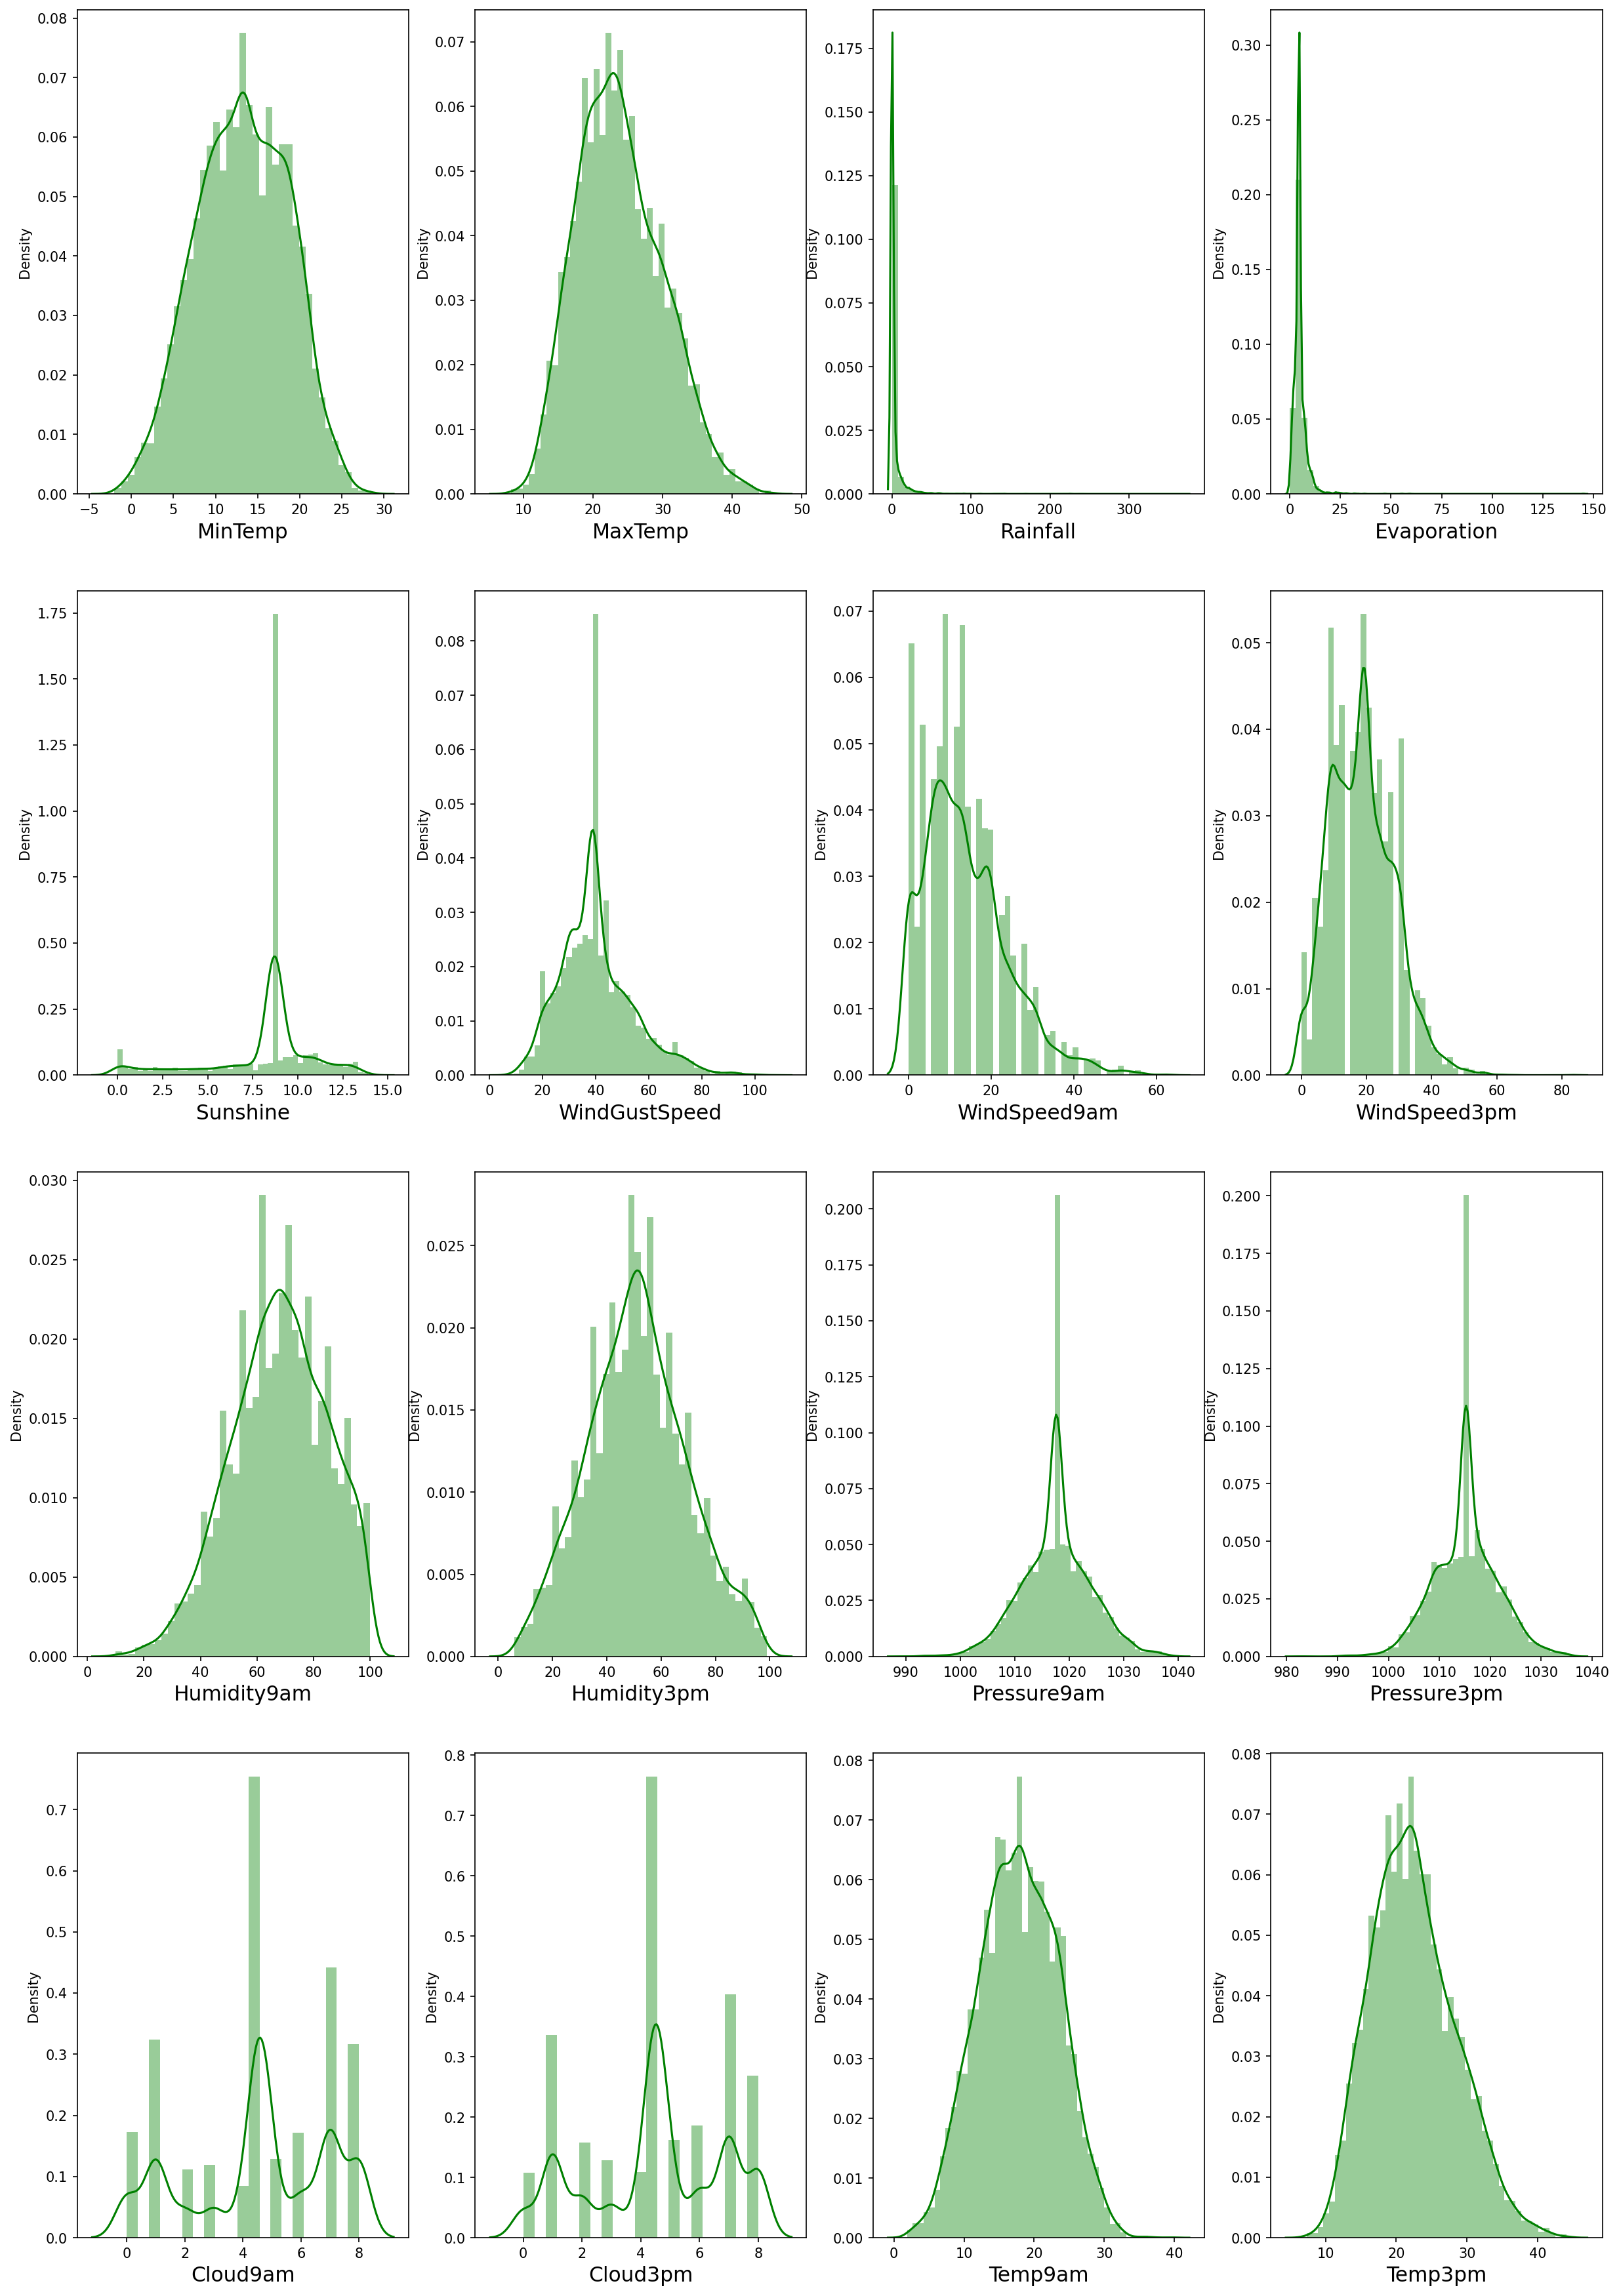

In [26]:
plt.figure(figsize=(20,30),dpi=150)
plotnumber = 1
for i in df[num_col]:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[i],color='g')
        plt.xlabel(i, fontsize=15)
    plotnumber += 1
plt.show()              

Most of the columns are normally distributed except Rainfall, Evaporation and WindSpeed9am which are right skewed.

# Checking distribution of categorical columns

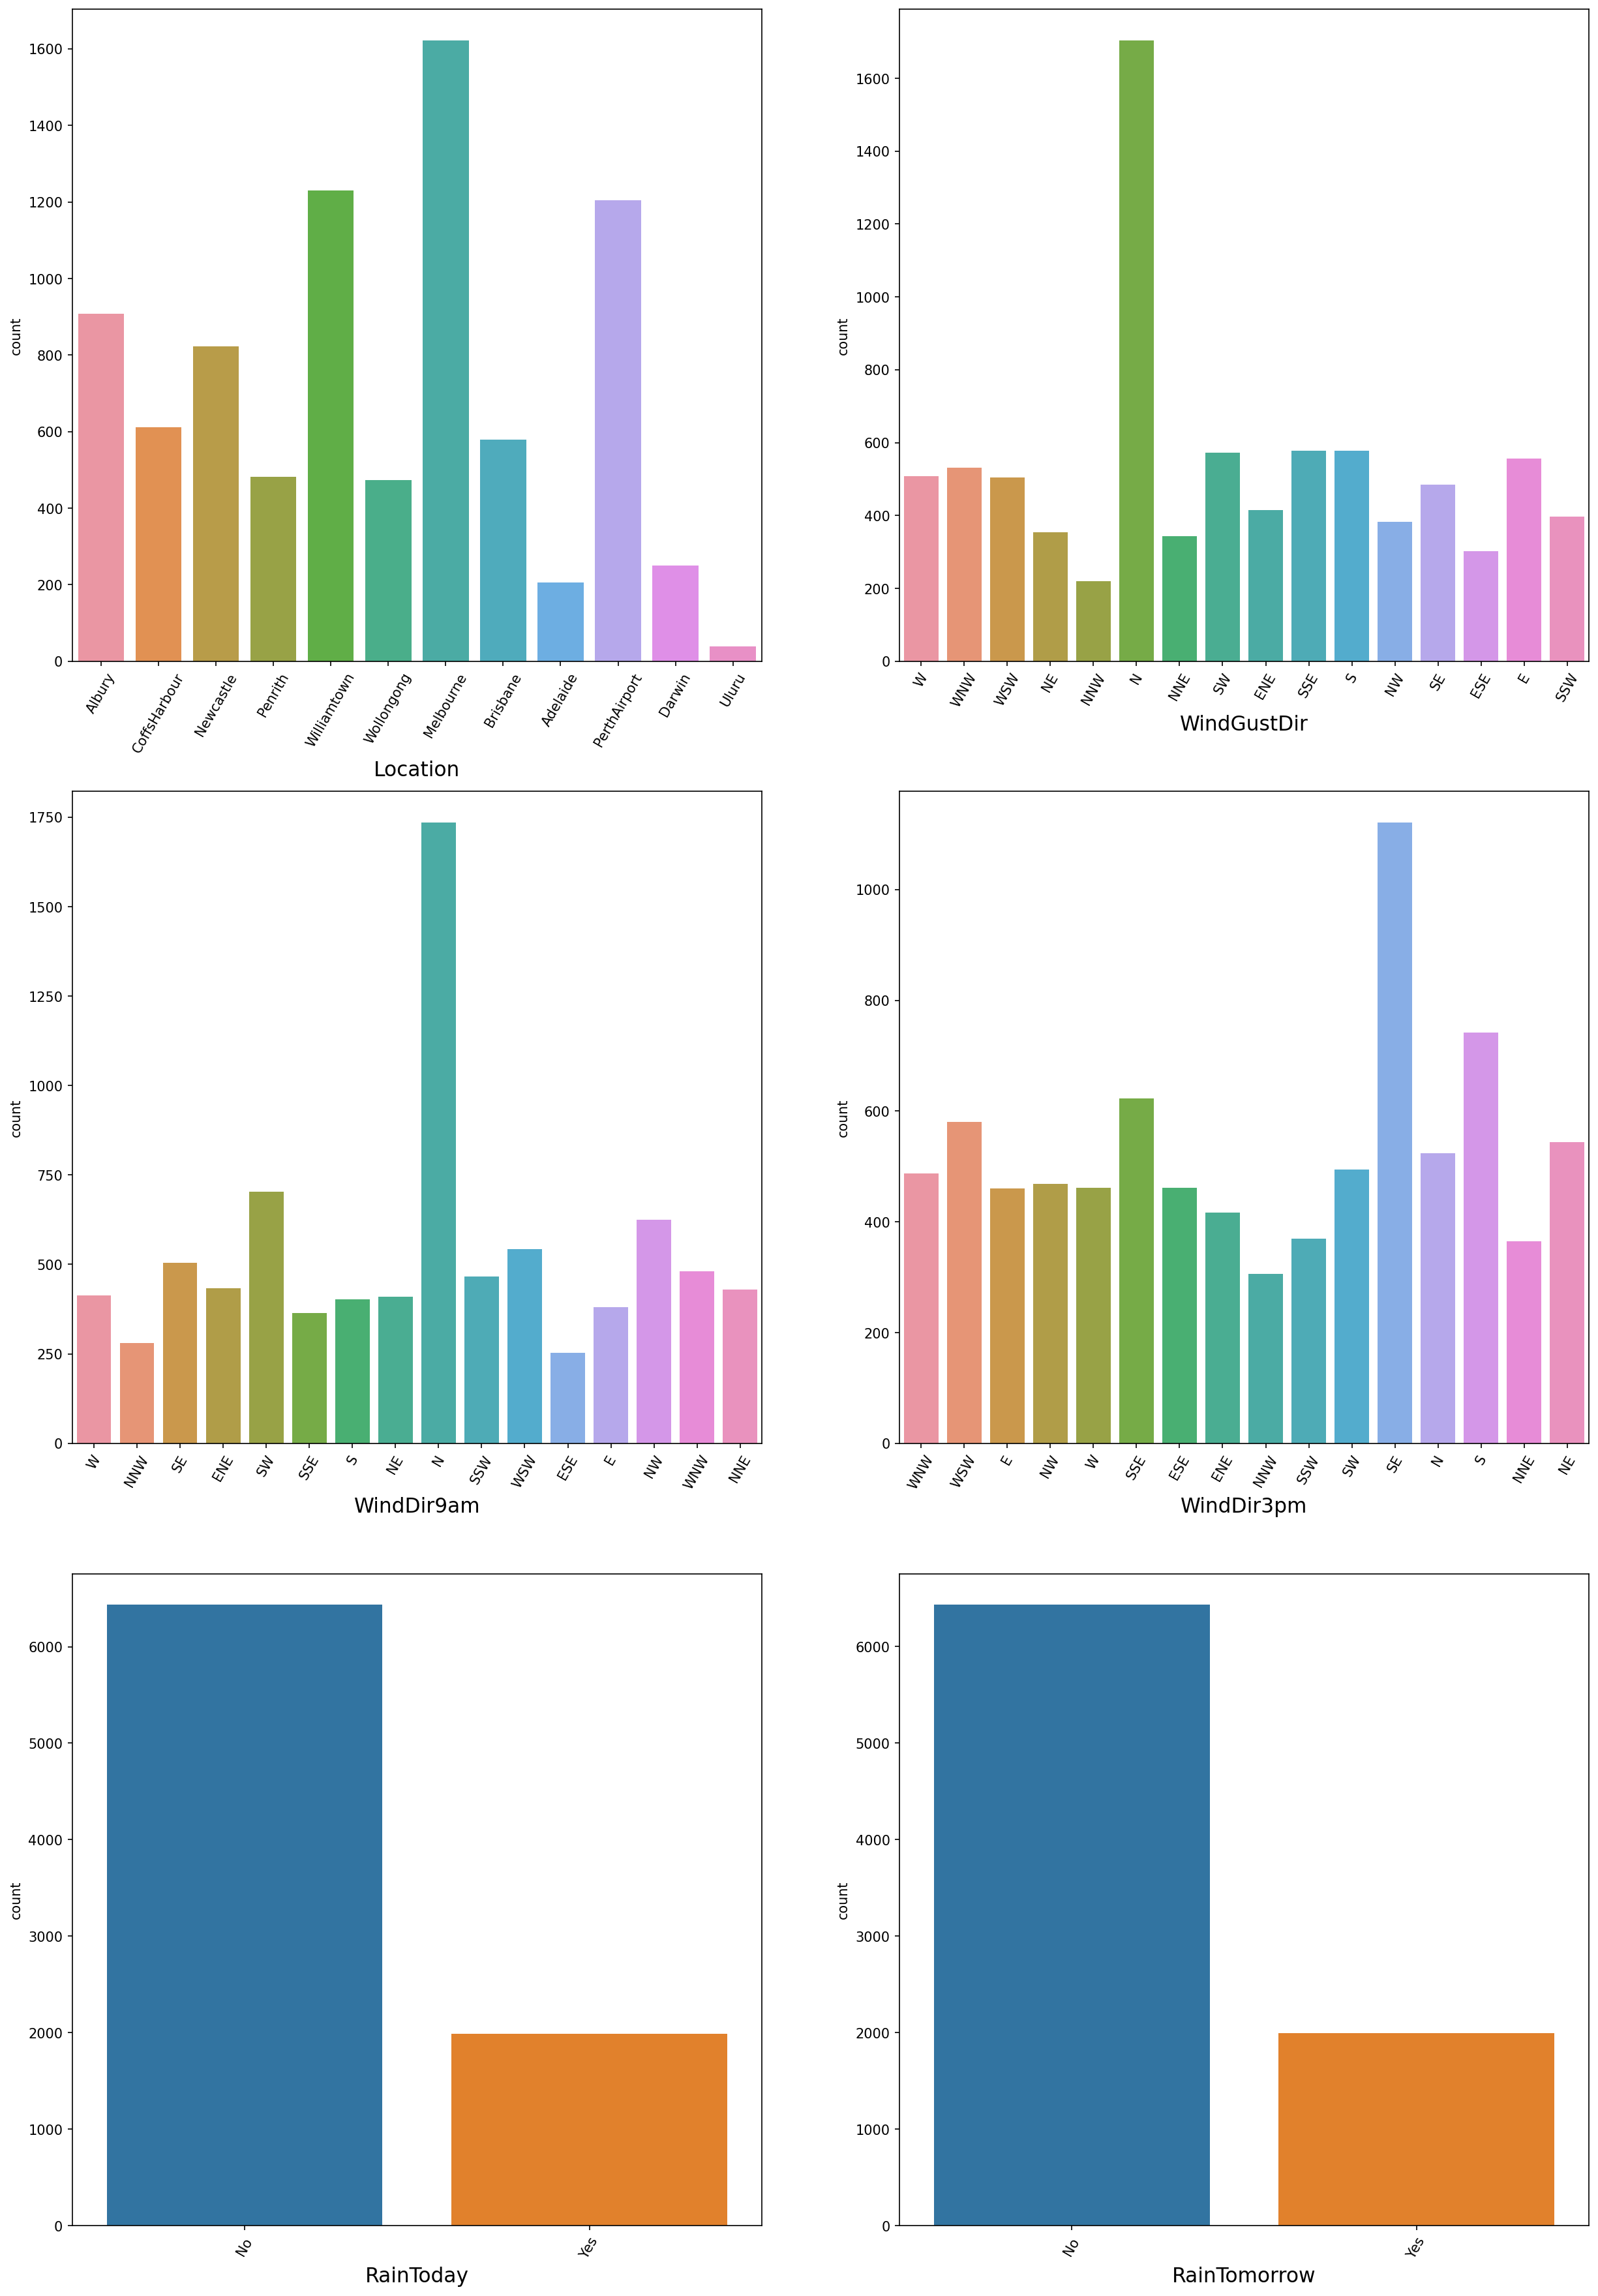

In [27]:
plt.figure(figsize=(20,30),dpi=150)
plotnumber = 1
for i in df[cat_col]:
    if plotnumber <= 16:
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i, fontsize=15)
        plt.xticks(rotation=60)
    plotnumber += 1
plt.show() 

observation:
-    melbourne has recoreded the highest data followed by williamtown and perthairport
-    WindGustDir has srong presence from north direction
-    direction of wind at 9am is strongest from north direction.
-    direction of wind at 3pm is strongest from north direction followed by south.
-    rain today and tomorrow both has less chance of rainfall .

# BI-Variate analysis

In [28]:
def cat_col(df,col):
    plt.figure(figsize=(10,5),dpi=100)
    plt.subplot(1,2,1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(1,2,2)
    sns.countplot(df[col],hue='RainTomorrow',data=df)
    plt.xticks(rotation=60)
    print(df[col].value_counts())

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


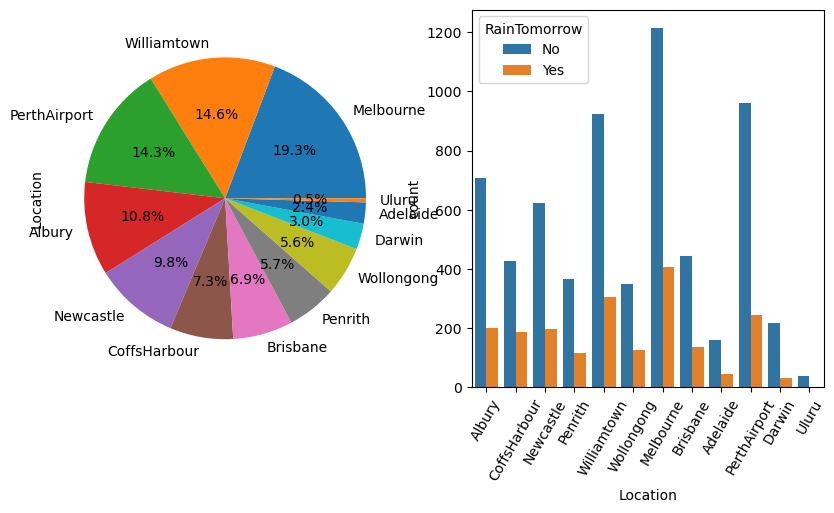

In [29]:
cat_col(df,'Location')

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


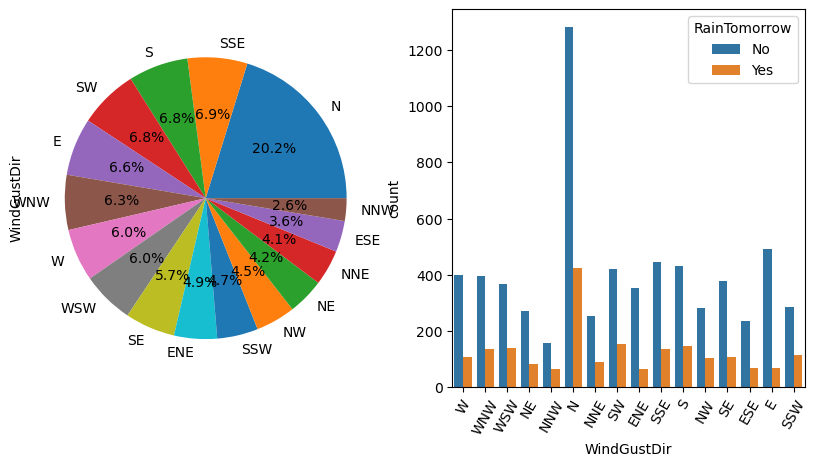

In [30]:
cat_col(df,'WindGustDir')

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


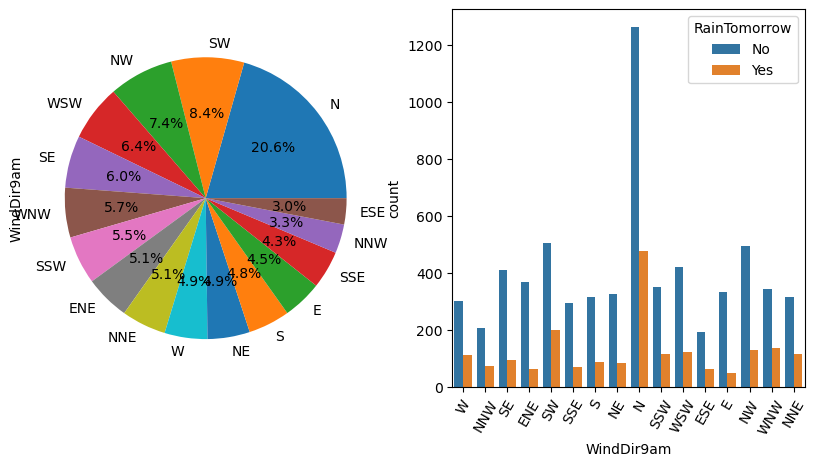

In [31]:
cat_col(df,'WindDir9am')

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


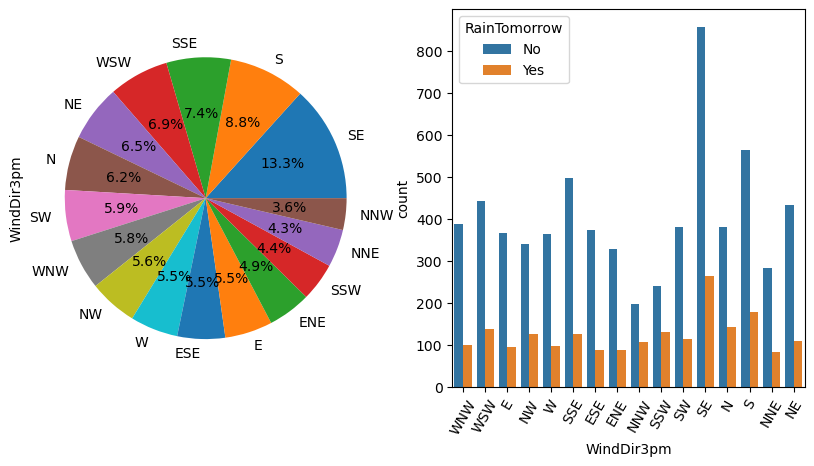

In [32]:
cat_col(df,'WindDir3pm')

No     6435
Yes    1990
Name: RainToday, dtype: int64


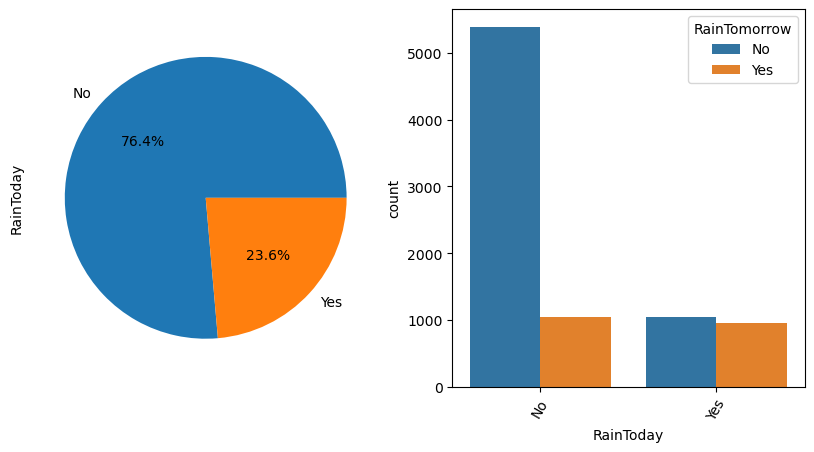

In [33]:
cat_col(df,'RainToday')

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


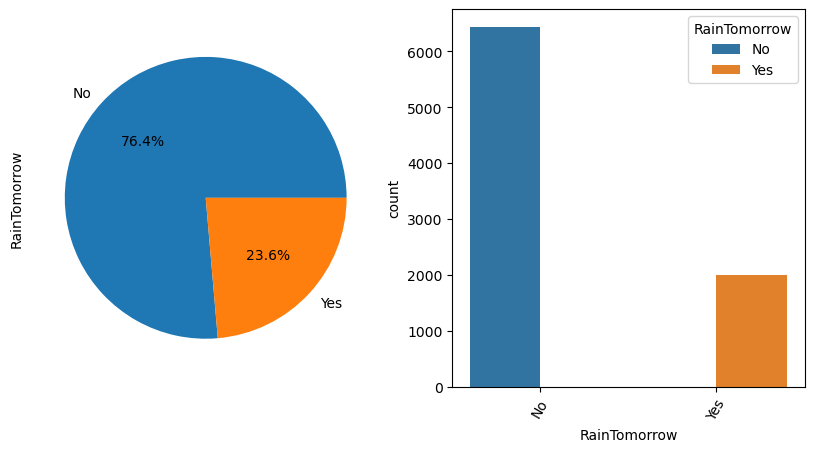

In [34]:
cat_col(df,'RainTomorrow')

# for numerical columns

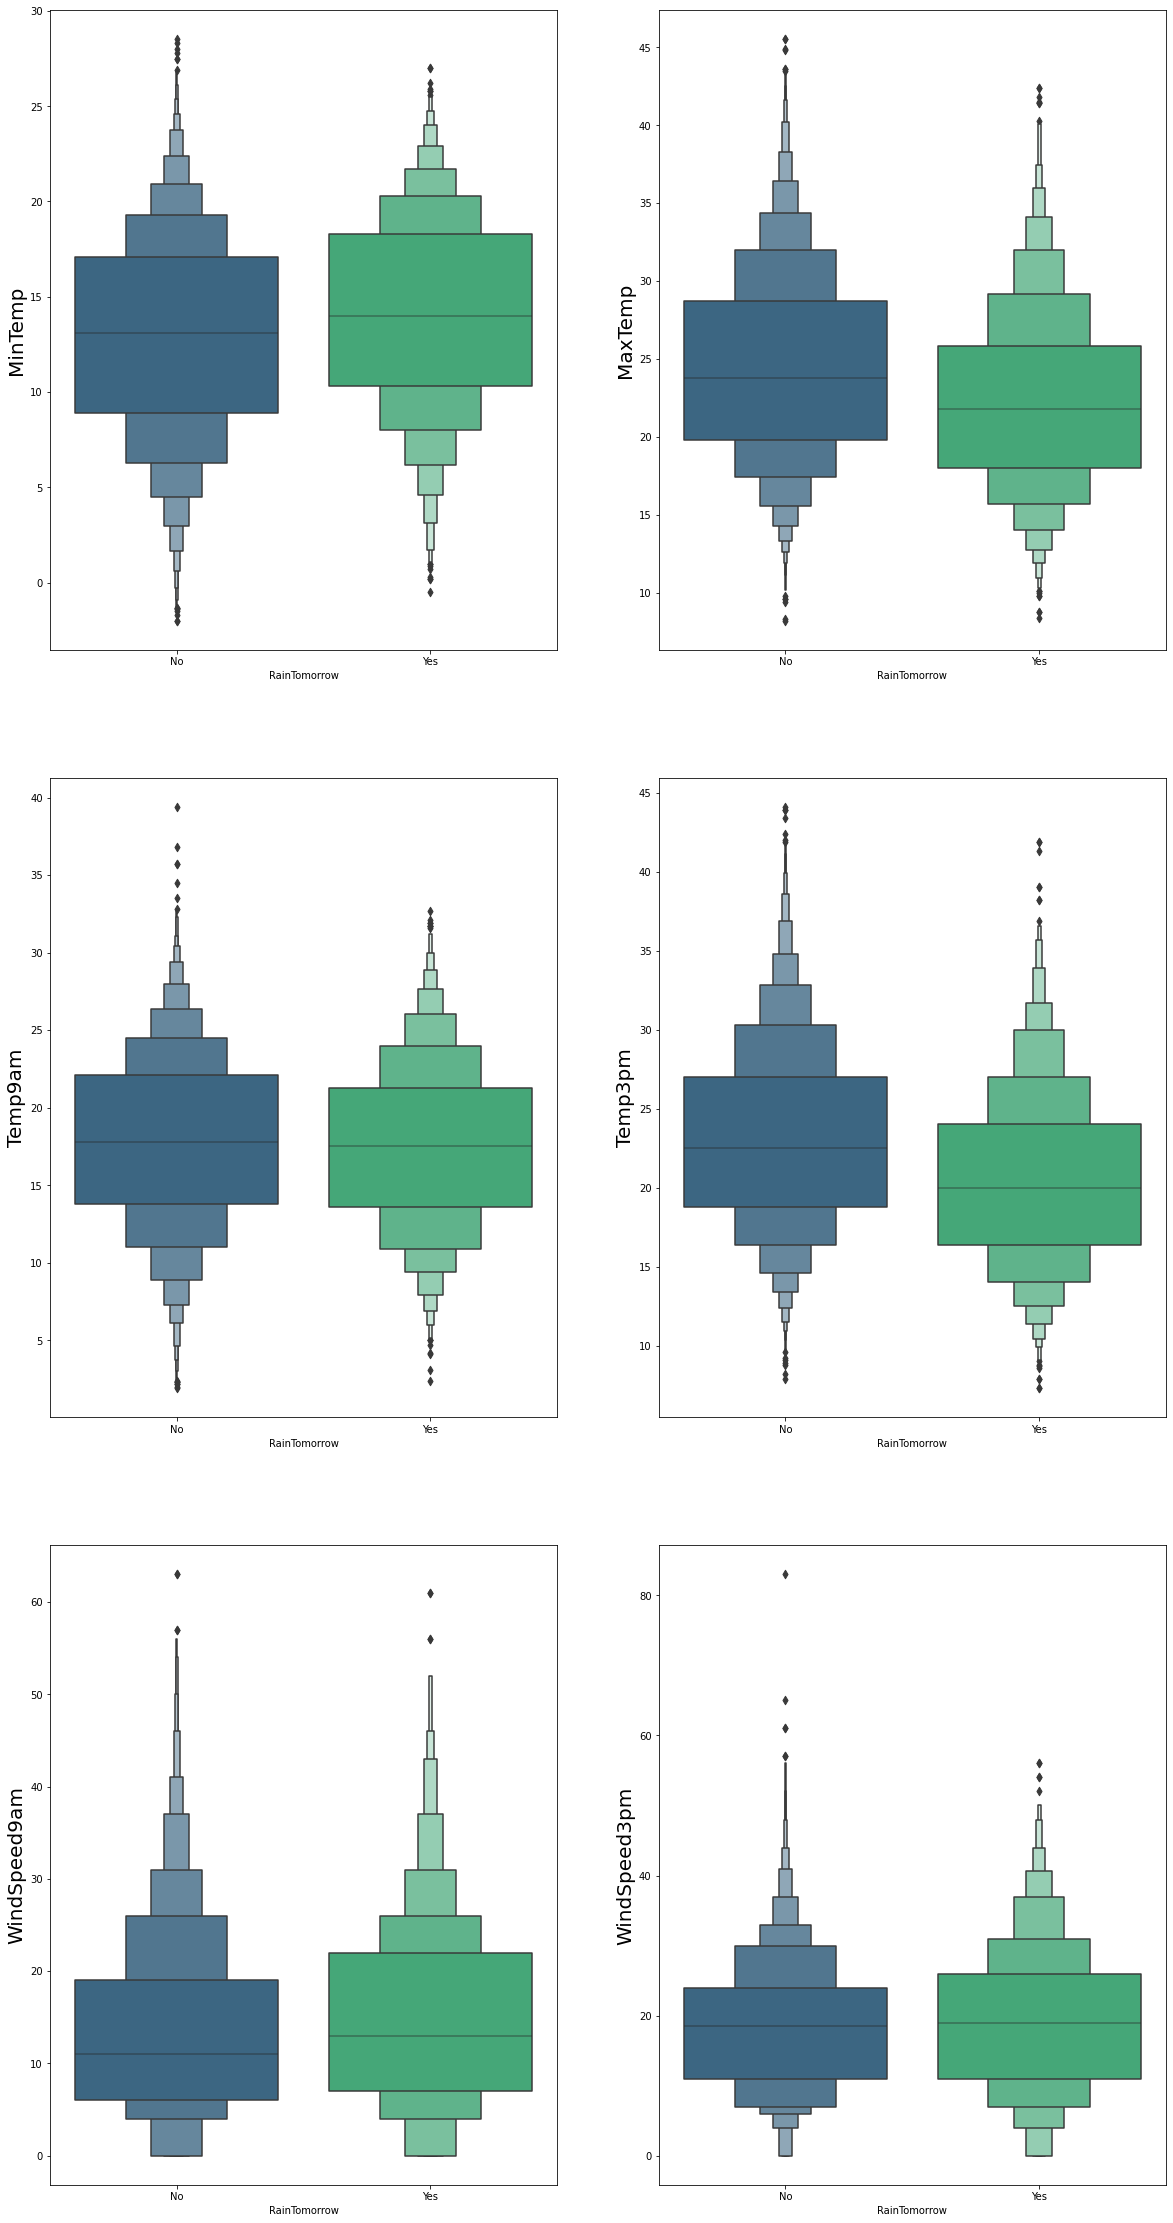

In [35]:
#Checking the relationship between numerical columns and the target variable
num_col1 = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindSpeed9am', 'WindSpeed3pm']
num_col2 = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am']
num_col3 = [ 'Pressure9am', 'Pressure3pm','Humidity3pm', 'Cloud9am', 'Cloud3pm']
plt.figure(figsize = (20,40))
plotnumber = 1
for i in df[num_col1]:
    if plotnumber <= 6:
        ax = plt.subplot(3,2, plotnumber)
        sns.boxenplot(x = df.RainTomorrow, y = df[i], palette = 'viridis')
        plt.ylabel(i, fontsize = 20)
        
    plotnumber += 1
plt.show()

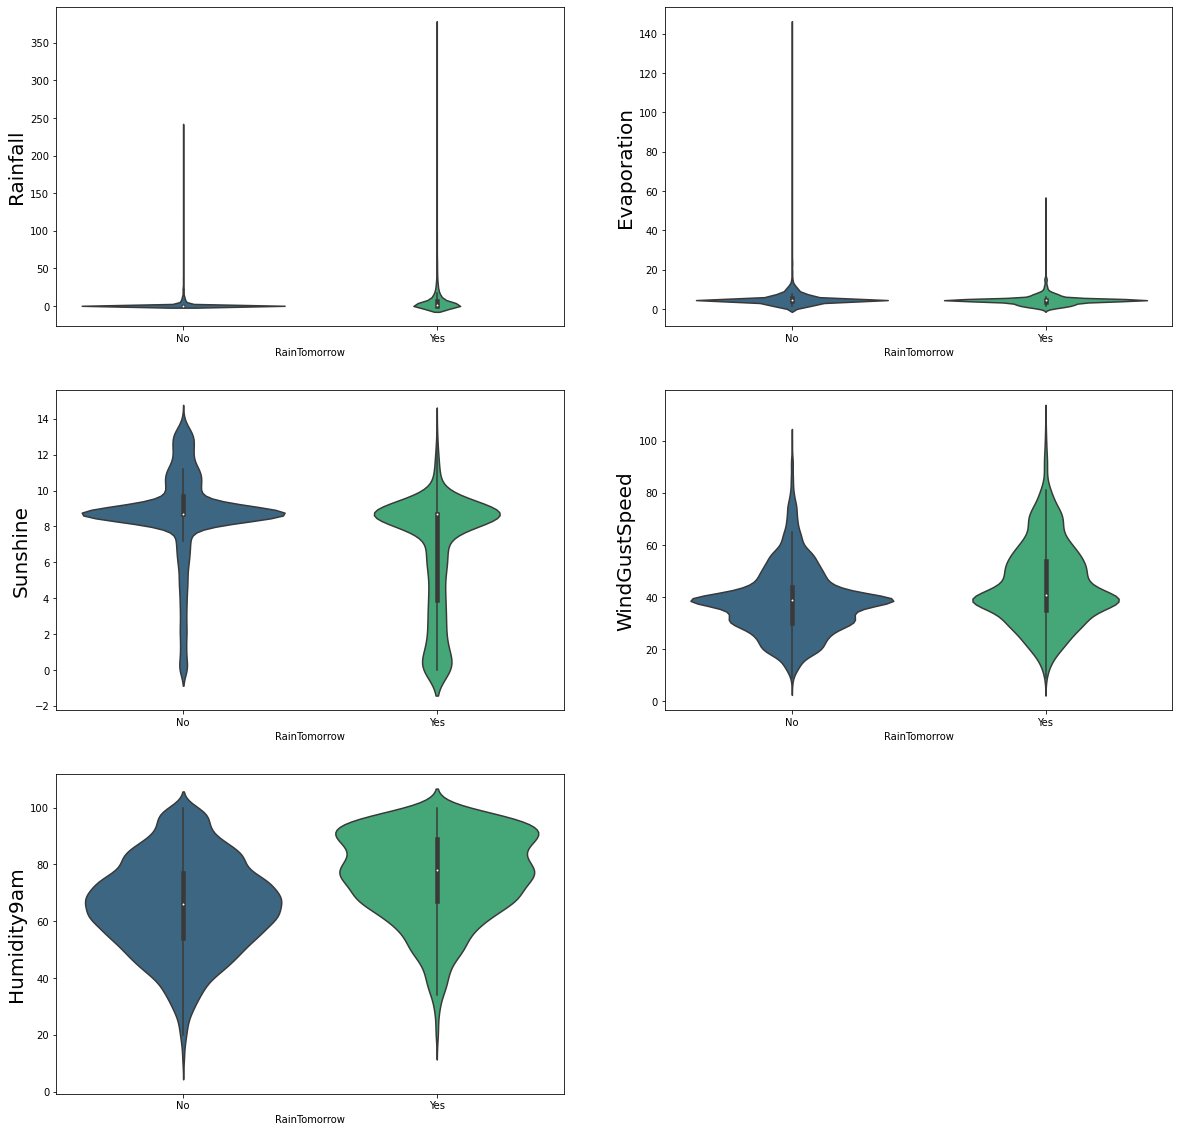

In [36]:
plt.figure(figsize = (20,20))
plotnumber = 1
for i in df[num_col2]:
    if plotnumber <= 6:
        ax = plt.subplot(3,2, plotnumber)
        sns.violinplot(x = df.RainTomorrow, y = df[i], palette = 'viridis')
        plt.ylabel(i, fontsize = 20)
        
    plotnumber += 1
plt.show()

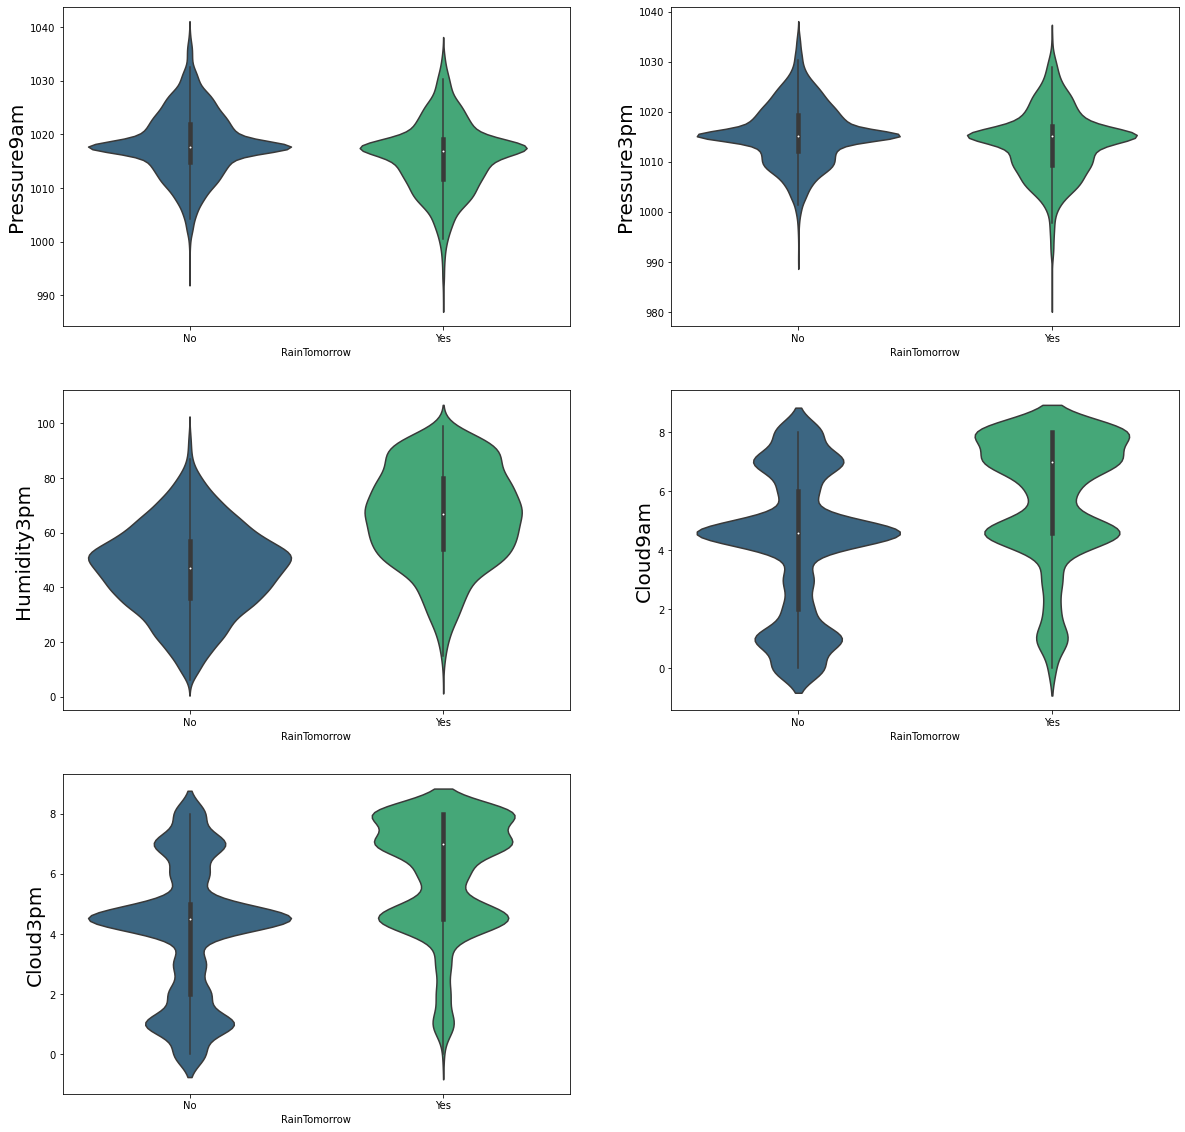

In [37]:
plt.figure(figsize = (20,20))
plotnumber = 1
for i in df[num_col3]:
    if plotnumber <= 6:
        ax = plt.subplot(3,2, plotnumber)
        sns.violinplot(x = df.RainTomorrow, y = df[i], palette = 'viridis')
        plt.ylabel(i, fontsize = 20)
        
    plotnumber += 1
plt.show()

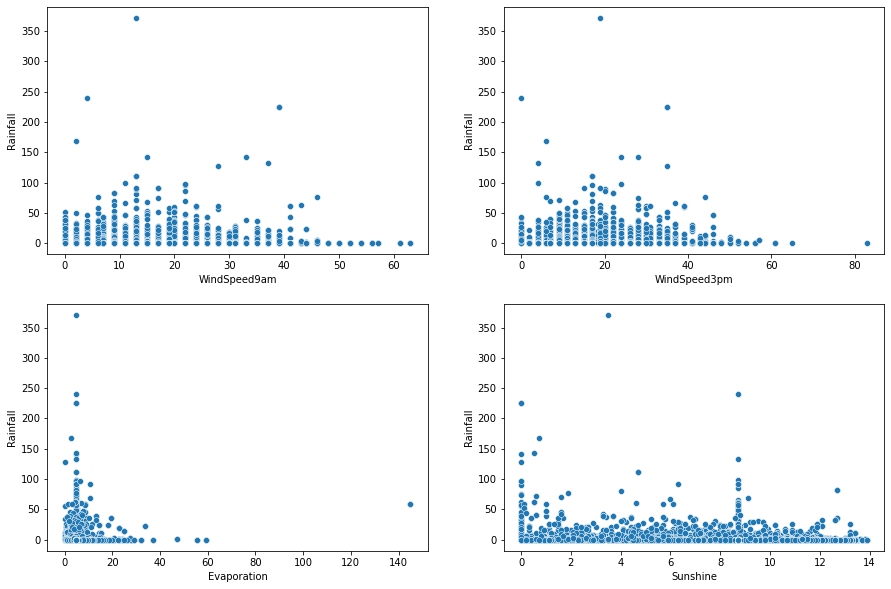

In [38]:
#Checking relationship between features and the second target variable 'Rainfall'
fig, axes = plt.subplots(2,2, figsize = (15,10))

#Checking the relation between WindSpeed9am and Rainfall
sns.scatterplot(x = 'WindSpeed9am', y = 'Rainfall', ax = axes[0,0], data = df)

#Checking the relation between WindSpeed3pm and Rainfall
sns.scatterplot(x = 'WindSpeed3pm', y = 'Rainfall', ax = axes[0,1], data = df)

#Checking the relation between Evaporation and Rainfall
sns.scatterplot(x = 'Evaporation', y = 'Rainfall', ax = axes[1,0], data = df)

#Checking the relation between Sunshine and Rainfall
sns.scatterplot(x = 'Sunshine', y = 'Rainfall', ax = axes[1,1], data = df)
plt.show()

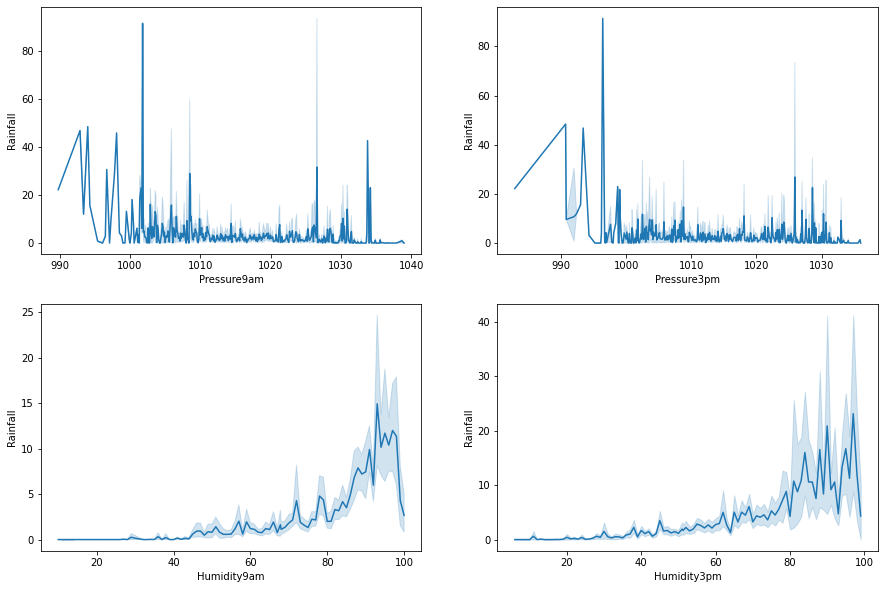

In [39]:
#Checking relationship between features and the second target variable 'Rainfall'
fig, axes = plt.subplots(2,2, figsize = (15,10))

#Checking the relation between Pressure9am and Rainfall
sns.lineplot(x = 'Pressure9am', y = 'Rainfall', ax = axes[0,0], data = df)

#Checking the relation between Pressure3pm and Rainfall
sns.lineplot(x = 'Pressure3pm', y = 'Rainfall', ax = axes[0,1], data = df)

#Checking the relation between Humidity9am and Rainfall
sns.lineplot(x = 'Humidity9am', y = 'Rainfall', ax = axes[1,0], data = df)

#Checking the relation between Humidity3pm and Rainfall
sns.lineplot(x = 'Humidity3pm', y = 'Rainfall', ax = axes[1,1], data = df)
plt.show()

# Now finding the outliers

In [40]:
num_cols = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        num_cols.append(i)
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

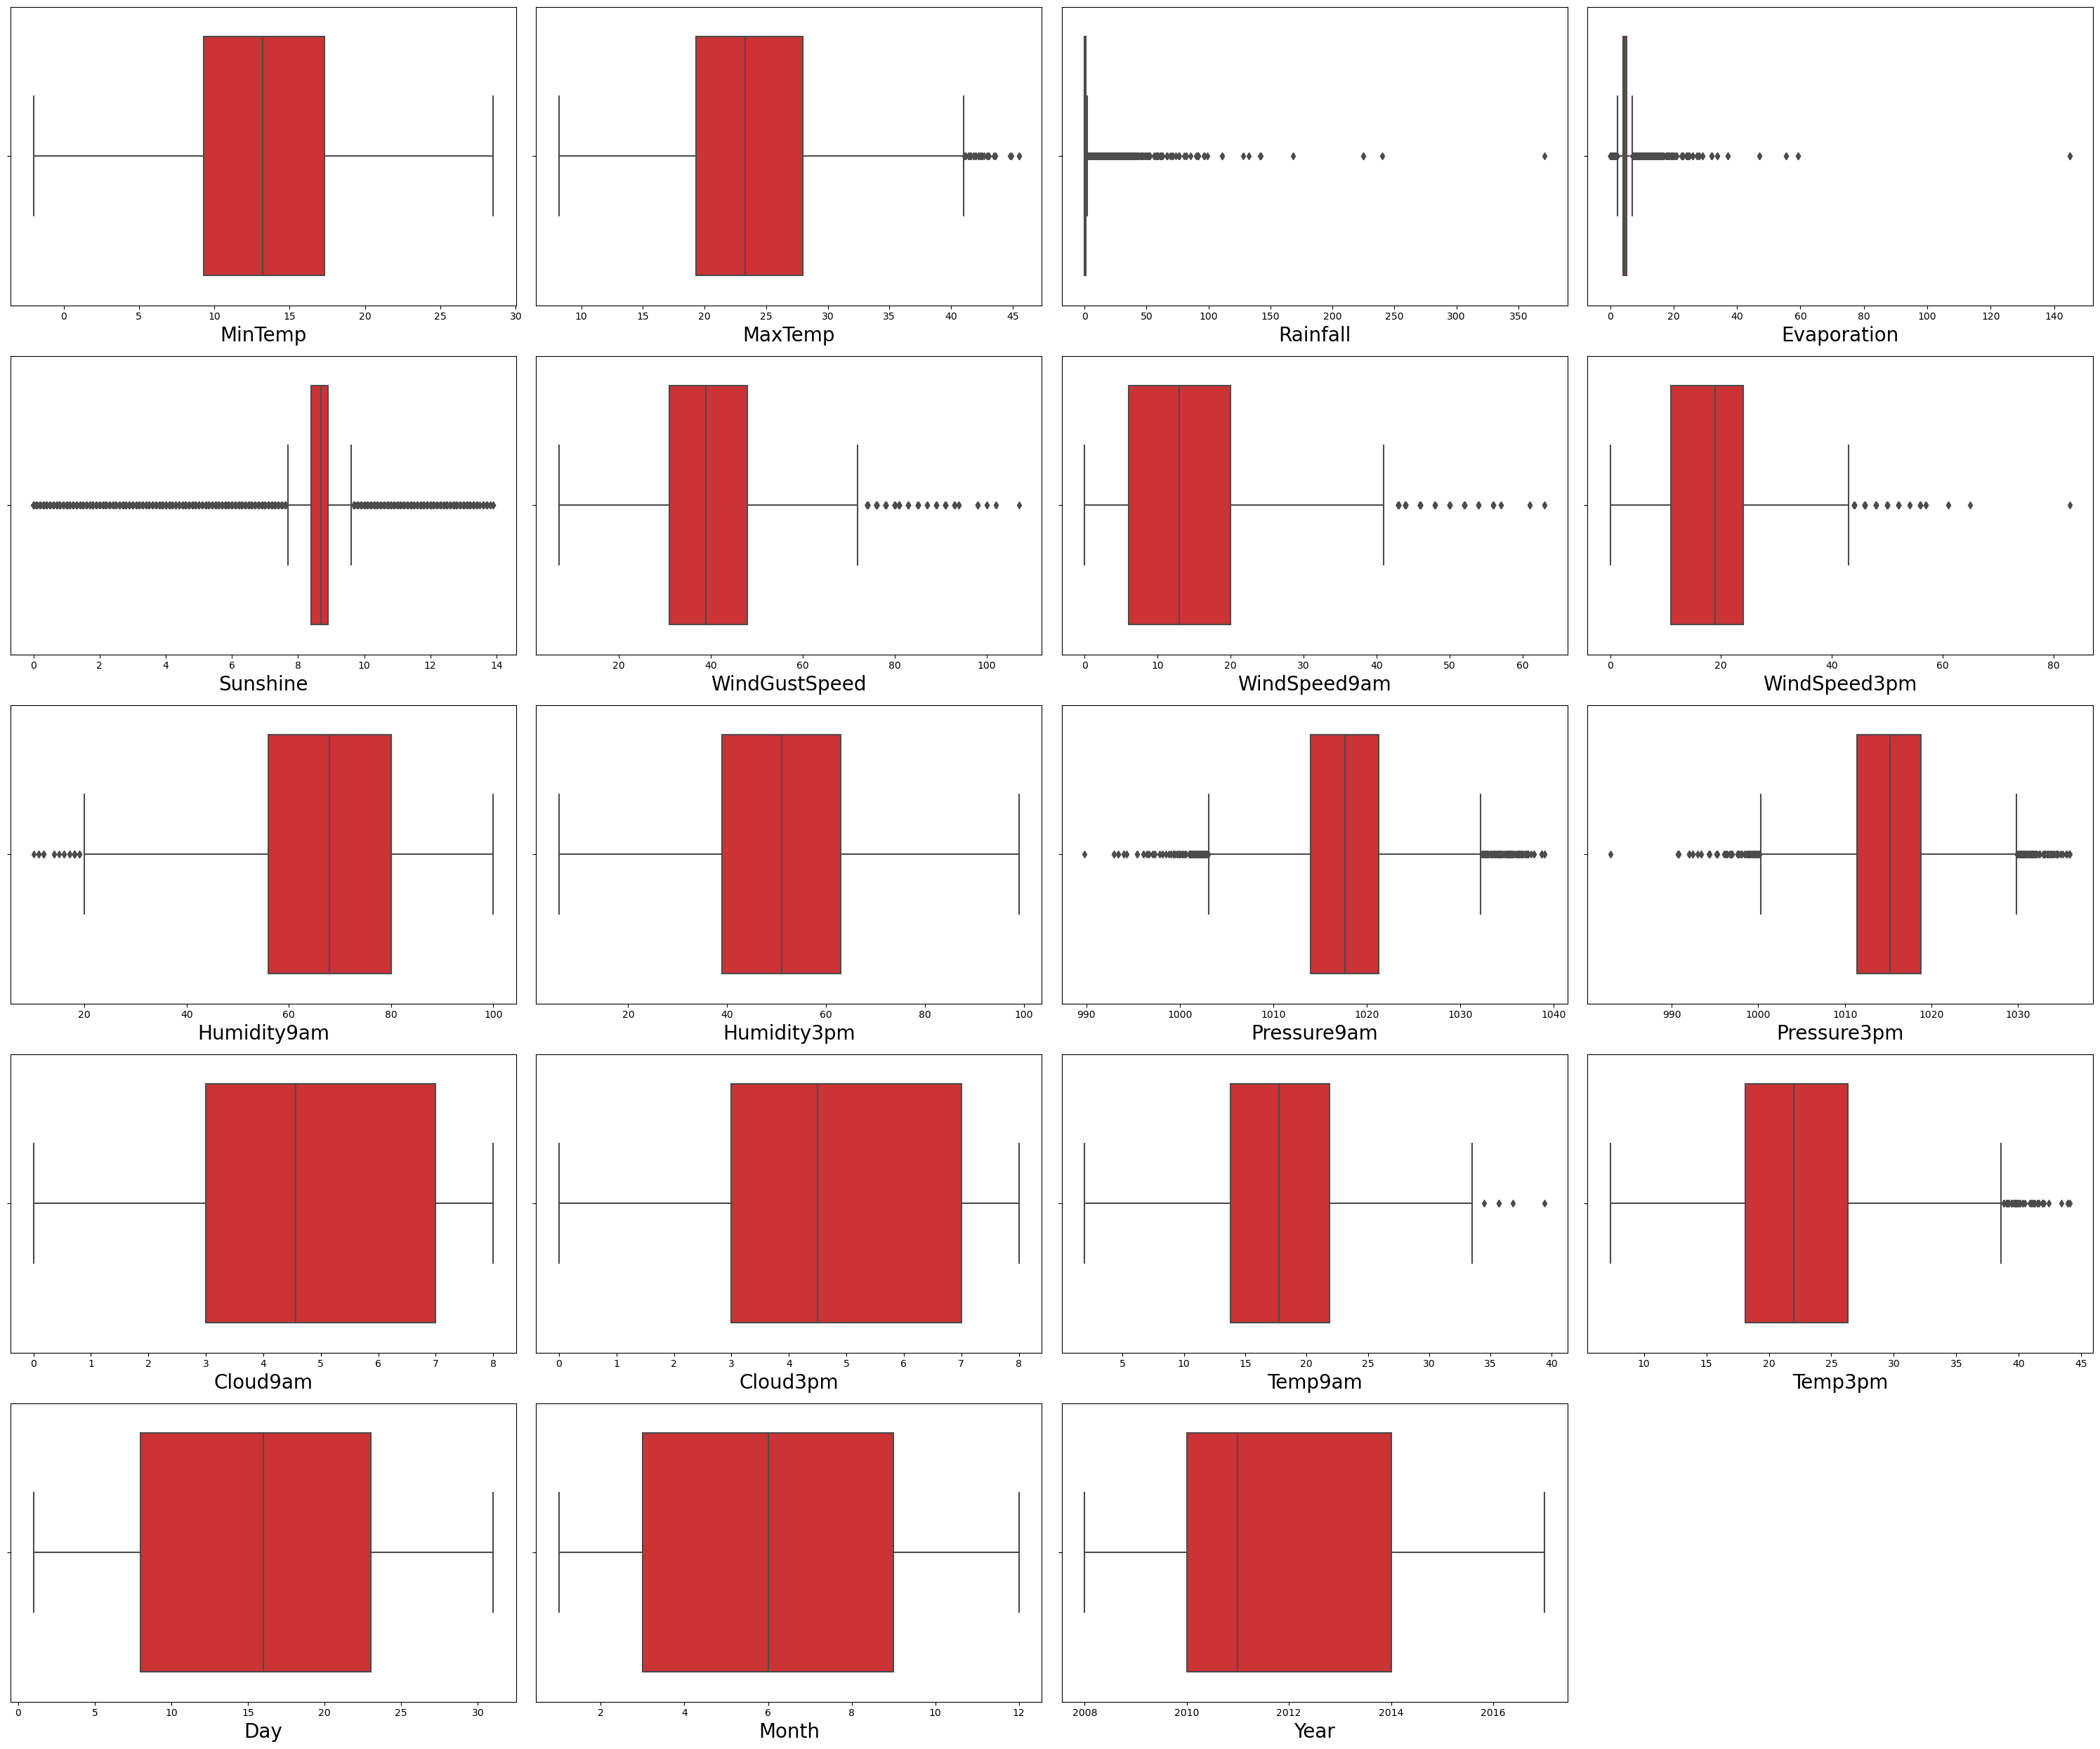

In [41]:
plt.figure(figsize=(30,25),dpi=100)
plotnumber=1

for i in num_cols:
    plt.subplot(5,4,plotnumber)
    sns.boxplot(df[i],palette='Set1')
    plt.xlabel(i,fontsize=20)
    plotnumber += 1
    plt.tight_layout()

from the above plot it has been clear that many outliers exists.Few colums are free from outliers like
 month ,day , year , mintemp.

# Treating ouliers with zscore

In [42]:
outliers = df[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]

In [43]:
z = np.abs(zscore(outliers))
df1 = df[(z<3).all(axis=1)]
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,4.6,8.7,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,4.6,8.7,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,4.6,8.7,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,4.6,8.7,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,4.6,8.7,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [44]:
df1.shape

(7987, 25)

In [45]:
#Checking skewness after using z score
df1.skew().sort_values()

Sunshine        -1.210547
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.539852
WindSpeed9am     0.713786
Evaporation      1.280696
Rainfall         3.519090
dtype: float64

few outliers exists in column like Rainfall,Evaporation,Windspeed9am

# CALCULATING DATA LOSS

In [46]:
print(df.shape)
print(df1.shape)

(8425, 25)
(7987, 25)


In [47]:
#Printing data loss after removing skewness
data_loss = (8425 - 7987)/8425 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  5.198813056379822


# USING POWER TRANSFORMER TO REMOVE SKEWNESS

In [48]:
from sklearn.preprocessing import PowerTransformer
skewed_cols = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']
transform = PowerTransformer(method = 'yeo-johnson')
df1[skewed_cols] = transform.fit_transform(df1[skewed_cols].values)

In [49]:
df1.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.040980
Evaporation      0.061105
Sunshine        -0.216154
WindGustSpeed    0.004523
WindSpeed9am    -0.110908
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

still little bit of skewness exists in rainfall columns.applying logarithmic methos to remove this

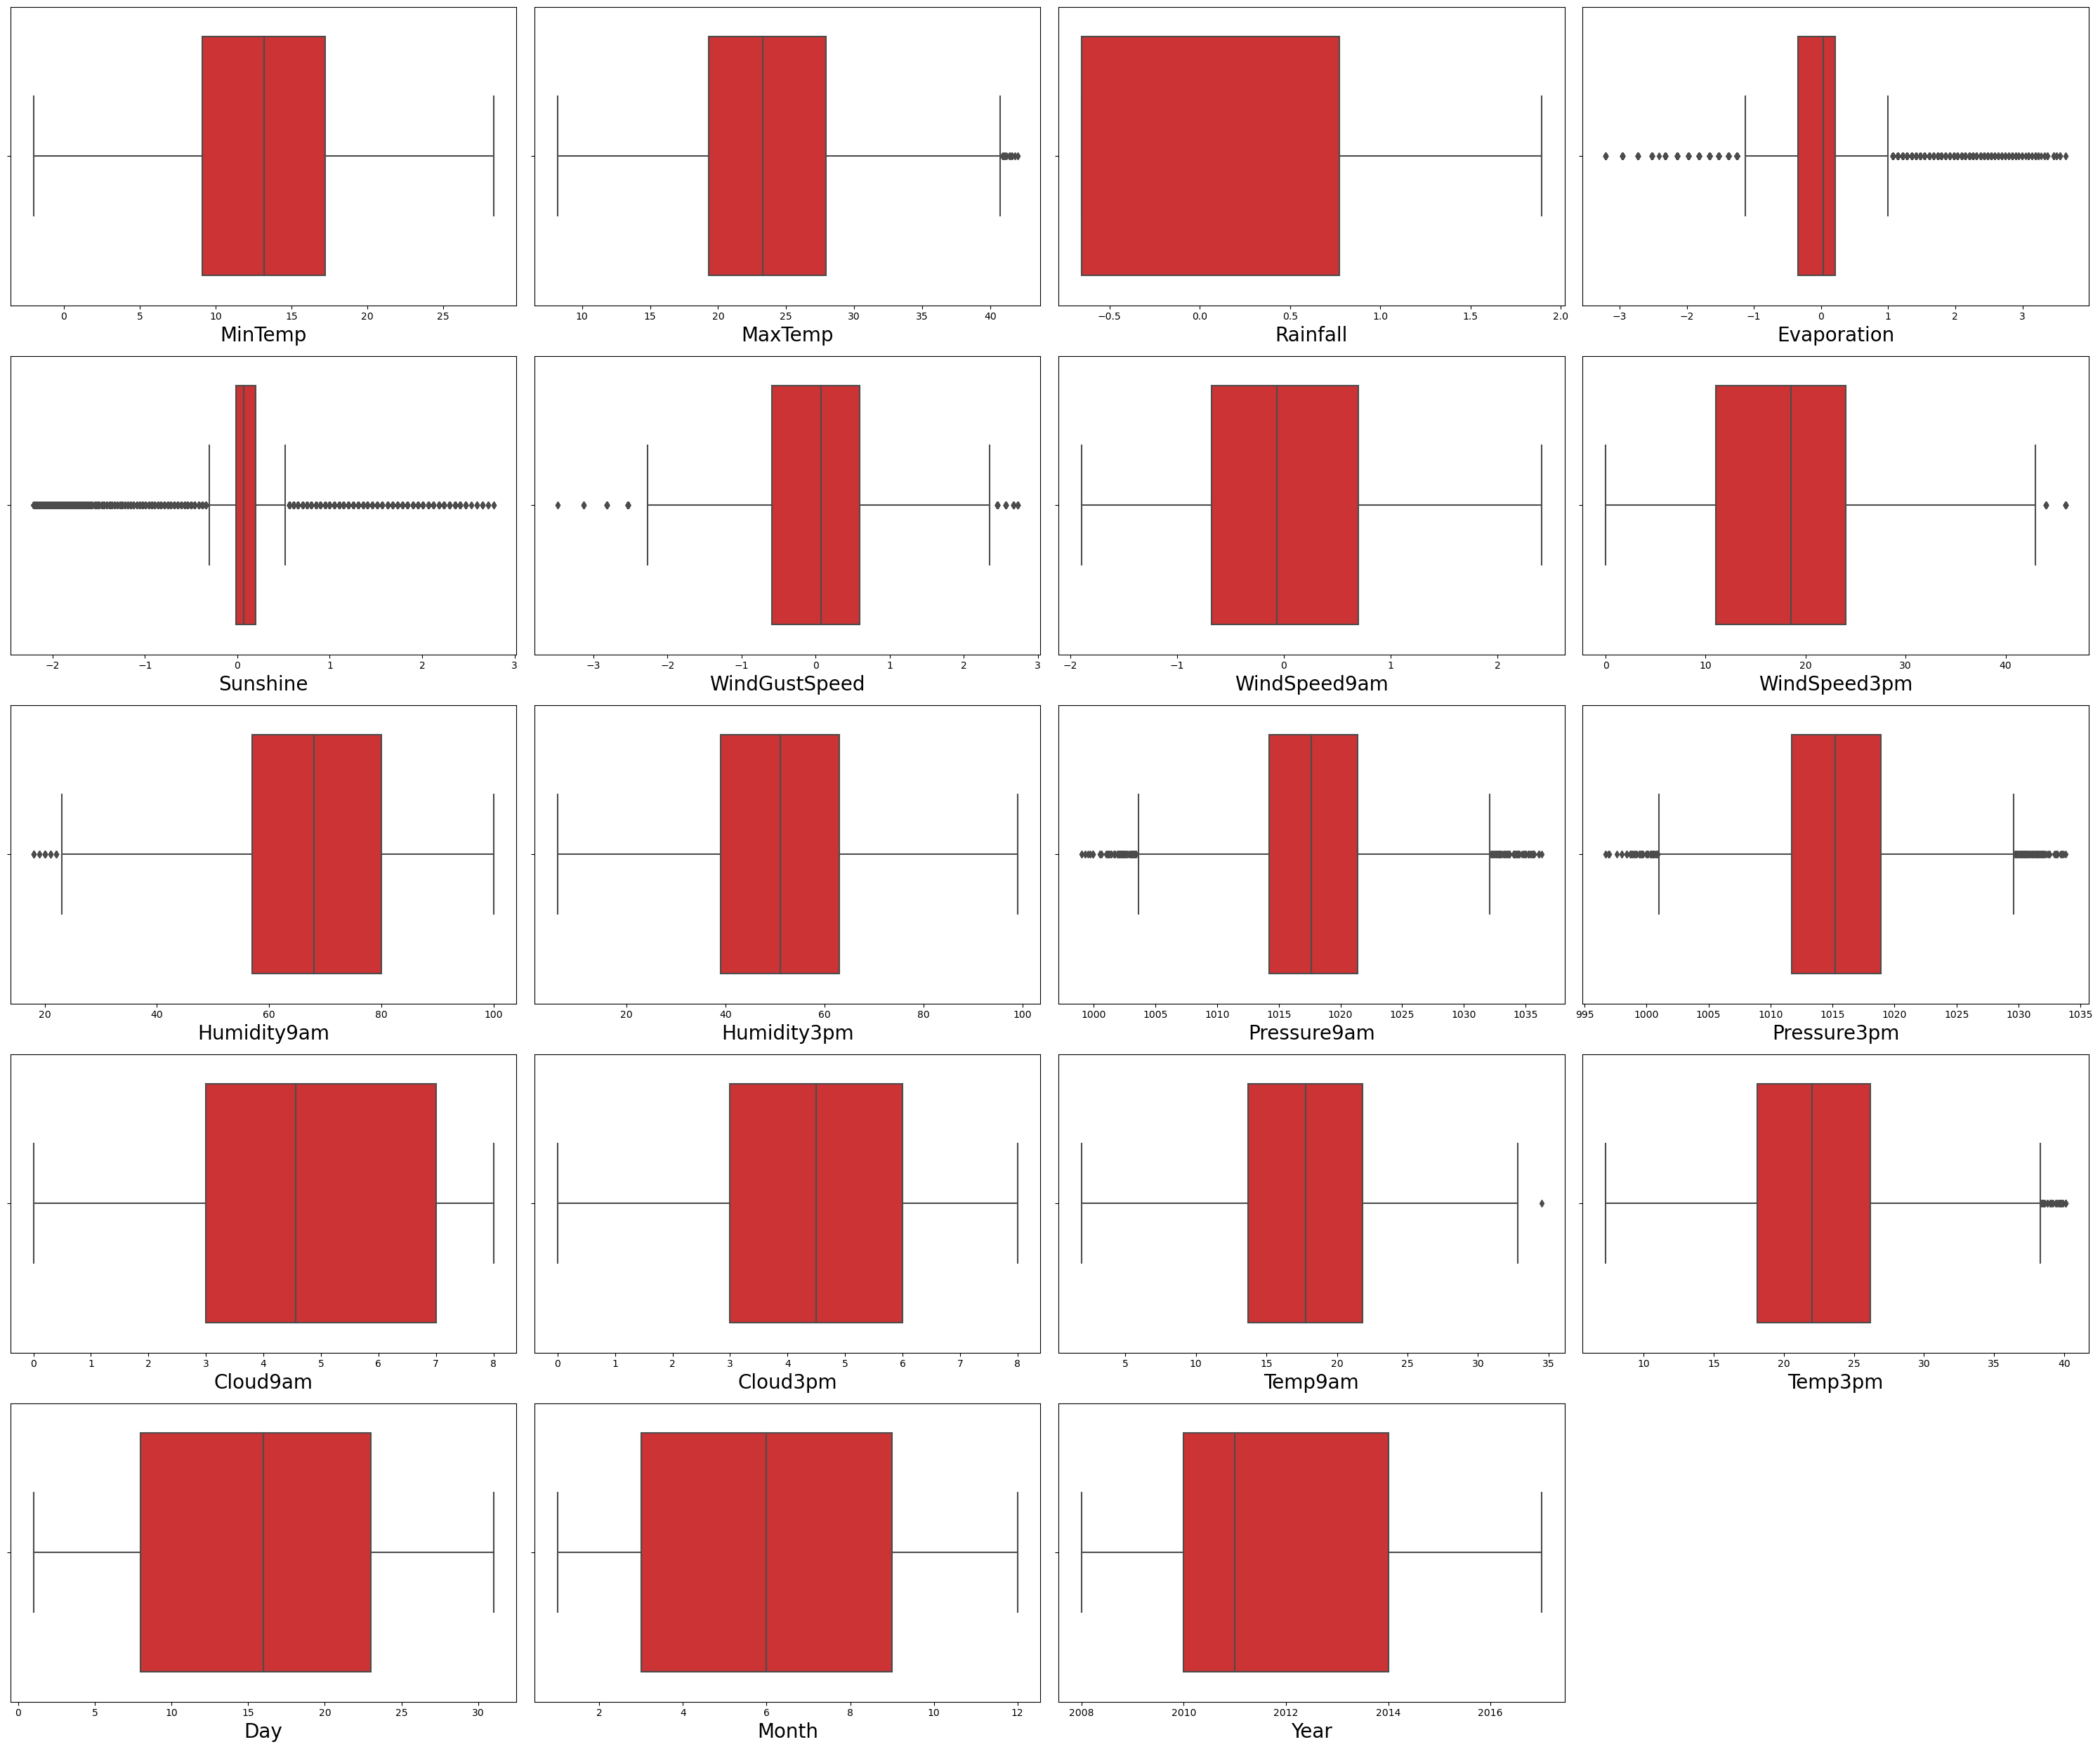

In [50]:
plt.figure(figsize=(30,25),dpi=100)
plotnumber=1

for i in num_cols:
    plt.subplot(5,4,plotnumber)
    sns.boxplot(df1[i],palette='Set1')
    plt.xlabel(i,fontsize=20)
    plotnumber += 1
    plt.tight_layout()

we observe that many outliers has been removed and dataloss is also in permissible range .so we cant use IQR methos as data loss is
large which is not good for prediction

# Now encoding the Categorical column

In [51]:
cat_col = [
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [52]:
from sklearn.preprocessing import OrdinalEncoder
encoding =OrdinalEncoder()

In [53]:
for i in cat_col:
    df1[i] = encoding.fit_transform(df1[i].values.reshape(-1,1))

In [54]:
df1.shape

(7987, 25)

In [55]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.9,0.773058,0.033069,0.068796,13.0,0.448790,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.1,-0.654231,0.033069,0.068796,14.0,0.448790,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.7,-0.654231,0.033069,0.068796,15.0,0.593637,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.0,-0.654231,0.033069,0.068796,4.0,-1.250093,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.3,1.135607,0.033069,0.068796,13.0,0.224831,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008


In [56]:
df1.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
Day                int64
Month              int64
Year               int64
dtype: object

total columns are in numerical form 

# Checking correlation to find multicollinearity

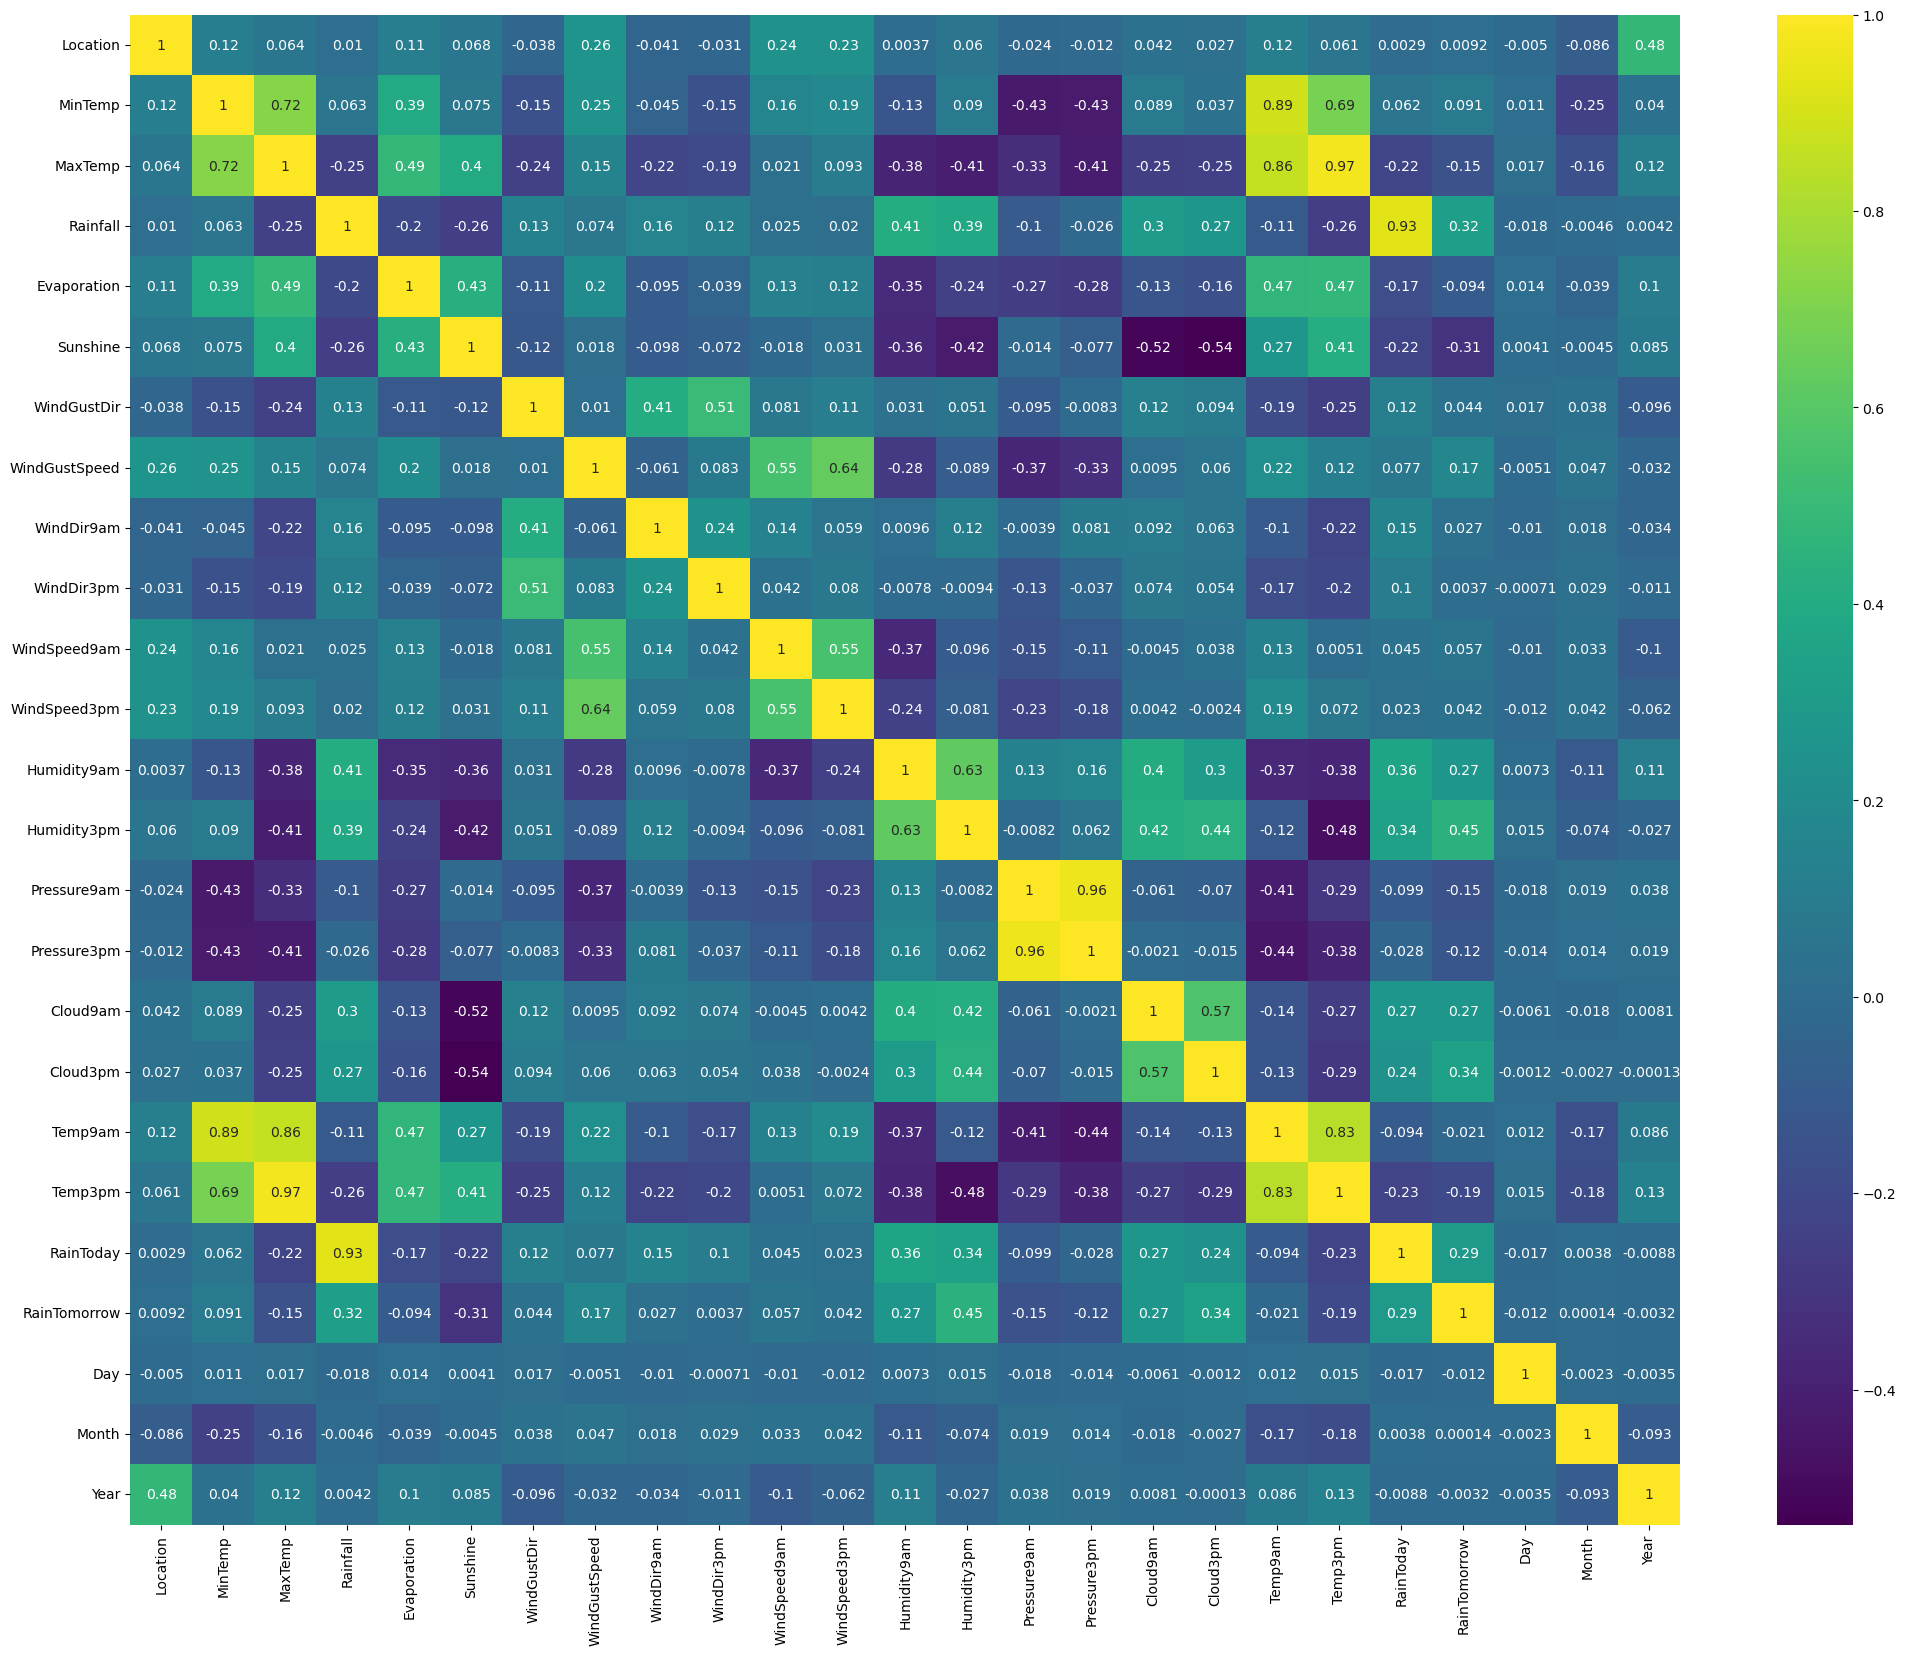

In [57]:
plt.figure(figsize=(25,20),dpi=100)
sns.heatmap(df1.corr(),annot=True,cmap='viridis')
plt.show();

observation:
- Multicollinearity problem is present in the dataset.
- target Rainfall is highly correlated with RainToday, followed by Humidity9am and Humidity3pm.
-Least correlation is between rainfall and year, month, WindSpeed9am, Windspeed3pm, location.
-Target RainTomorrow is highly correlated with Humidity3pm followed by Cloud3pm.
-RainTomorrow is least correlated with Year, month and Wind Direction3pm.
- maxtemp is highly correlated with temp3pm

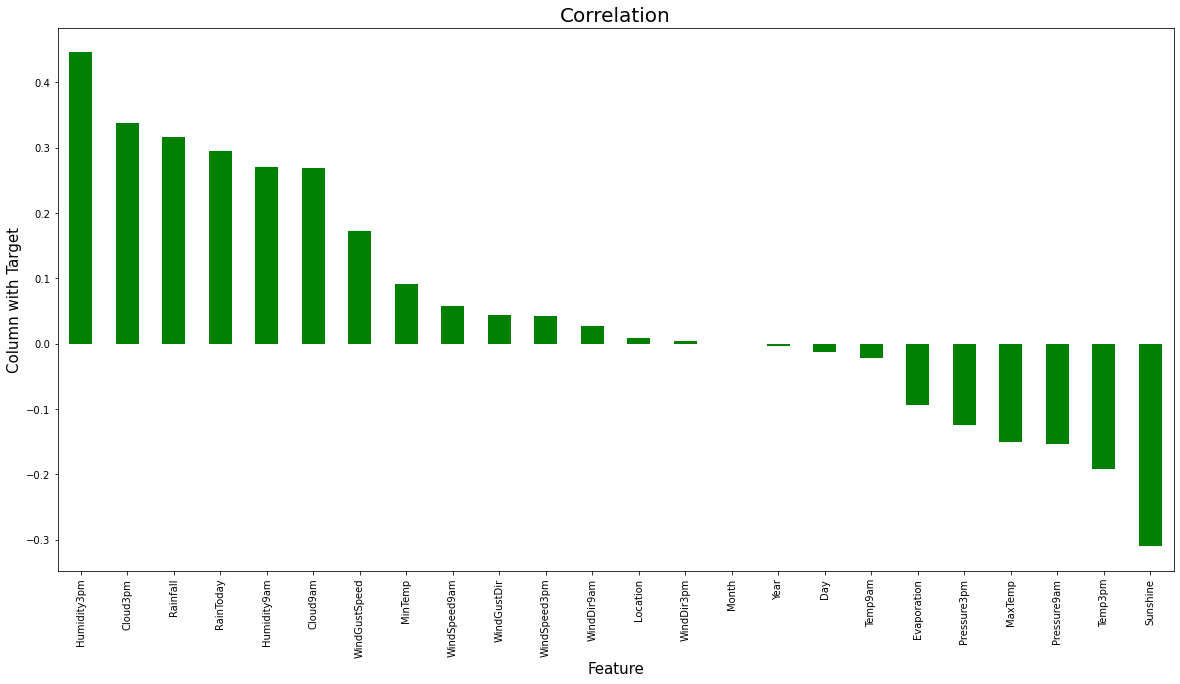

In [58]:
#Visualizing correlation
plt.figure(figsize = (20,10))
df1.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind = 'bar', color = 'green')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Column with Target', fontsize = 15)
plt.title('Correlation', fontsize = 20)
plt.show()

# splliting the dataset

In [59]:
x = df1.drop(columns=['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

In [60]:
x.shape

(7987, 24)

In [61]:
y.shape

(7987,)

# standarization using standard scaler

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.773058,0.033069,0.068796,1.229267,0.448790,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.654231,0.033069,0.068796,1.441960,0.448790,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.654231,0.033069,0.068796,1.654654,0.593637,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.654231,0.033069,0.068796,-0.684977,-1.250093,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,1.135607,0.033069,0.068796,1.229267,0.224831,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315


# checking multicollinearity

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF values,features
0,1.591499,Location
1,8.846980,MinTemp
2,26.386237,MaxTemp
3,8.425558,Rainfall
4,1.656017,Evaporation
5,2.020446,Sunshine
6,1.613647,WindGustDir
7,2.301626,WindGustSpeed
8,1.362189,WindDir9am
9,1.490437,WindDir3pm


We can see multicollinearity issue for MaxTemp, Pressure9am, Pressure3pm, Temp9am and Temp3pm.

In [65]:
x.drop('Temp3pm', axis = 1, inplace = True)
x.drop('MaxTemp',axis = 1,inplace=True)

In [66]:
# Checking VIF after removing Temp3pm,maxTemp
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.589431,Location
1,8.796149,MinTemp
2,8.384156,Rainfall
3,1.640821,Evaporation
4,2.007052,Sunshine
5,1.609391,WindGustDir
6,2.284153,WindGustSpeed
7,1.348840,WindDir9am
8,1.489264,WindDir3pm
9,1.987665,WindSpeed9am


In [67]:
x.drop('Pressure9am', axis = 1, inplace = True)
x.drop('Pressure3pm',axis = 1,inplace=True)

In [68]:
# Checking VIF after removing Pressure9am,Pressure3pm
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.581012,Location
1,8.675609,MinTemp
2,8.354461,Rainfall
3,1.616160,Evaporation
4,1.993426,Sunshine
5,1.584174,WindGustDir
6,2.130545,WindGustSpeed
7,1.314799,WindDir9am
8,1.415415,WindDir3pm
9,1.978011,WindSpeed9am


muticollinearity has been removed successfully

# Balancing the imbalance target column using smote

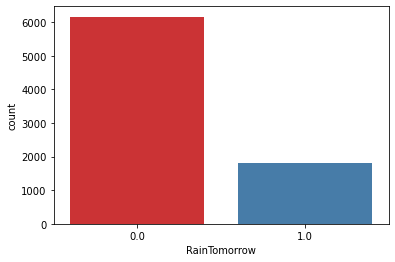

In [69]:
#Printing count of RainTomorrow
from imblearn.over_sampling import SMOTE
sns.countplot(y, palette = 'Set1')
plt.show()

In [70]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)

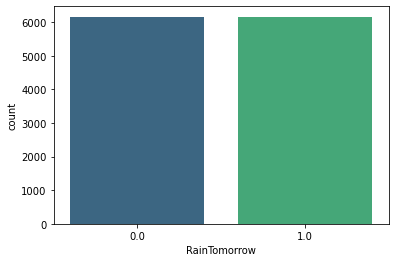

In [71]:
#Printing count of RainTomorrow after using SMOTE method
sns.countplot(y, palette = 'viridis')
plt.show()

In [72]:
#Scaling x dataset using Standard Scaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

# MODEL BUILDING

# 1.  Classification Model[for rainfall tomorrow]

In [73]:
#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score,StratifiedKFold, GridSearchCV,RepeatedStratifiedKFold

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

In [74]:
#Find best Random_state

maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7879156528791565 on Random State = 59


In [75]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 95)

In [76]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model]

In [77]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('#' * 70)

Accuracy_Score of  LogisticRegression() is 78.46715328467153
Confusion Matrix of  LogisticRegression()  is 
 [[992 262]
 [269 943]]
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1254
         1.0       0.78      0.78      0.78      1212

    accuracy                           0.78      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.78      0.78      0.78      2466

######################################################################
Accuracy_Score of  RidgeClassifier() is 78.58880778588808
Confusion Matrix of  RidgeClassifier()  is 
 [[1006  248]
 [ 280  932]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1254
         1.0       0.79      0.77      0.78      1212

    accuracy                           0.79      2466
   macro avg       0.79      0.79      0.79      2466
weighted avg       0.79      0.79      0.79      2466

#############

In [78]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('#' * 70)

Accuracy_Score of  LogisticRegression() is 78.46715328467153
cross Validation accuracy score of  LogisticRegression()  is  71.20032441200324
######################################################################
Accuracy_Score of  RidgeClassifier() is 78.58880778588808
cross Validation accuracy score of  RidgeClassifier()  is  71.42741281427413
######################################################################
Accuracy_Score of  DecisionTreeClassifier() is 88.72668288726683
cross Validation accuracy score of  DecisionTreeClassifier()  is  72.00324412003243
######################################################################
Accuracy_Score of  SVC() is 86.29359286293592
cross Validation accuracy score of  SVC()  is  72.01946472019465
######################################################################
Accuracy_Score of  KNeighborsClassifier() is 87.34793187347933
cross Validation accuracy score of  KNeighborsClassifier()  is  72.77372262773723
###################################

# CHECKING ROC-AUC CURVE FOR TRAIN AND TEST DATASET

# TRAIN DATASET

<Figure size 1440x1080 with 0 Axes>

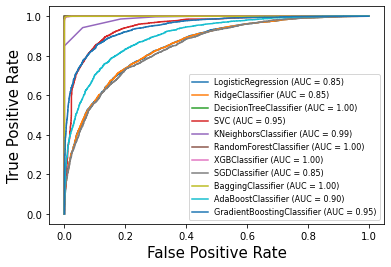

In [80]:
#Let's see how well our model works on training data.
plt.figure(figsize=(20,15))
disp = plot_roc_curve(LR_model,x_train,y_train)

plot_roc_curve(RD_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(DT_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SV_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(KNR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(RFR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(XGB_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SGH_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(Bag_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(ADA_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(GB_model, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size': 8}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

# TEST DATASET

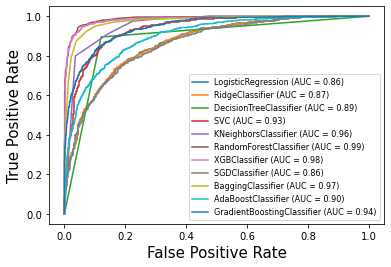

In [81]:
#Let's see how well our model works on test data.
disp = plot_roc_curve(LR_model, x_test, y_test)

plot_roc_curve(RD_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(DT_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SV_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(KNR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(RFR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(XGB_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SGH_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(Bag_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(ADA_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(GB_model, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size': 8}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

Best result is provided by Random forest model

# Best model is Random forest so we hypertune this model to check for better acuracy if possible

In [82]:
from sklearn.model_selection import GridSearchCV

In [86]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[12,15,16],
    'criterion':['gini','entropy'],
    'max_depth':[8,10,12],
    'min_samples_leaf':[5,6,7],
    'min_samples_split':[8,10,11],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 15}


In [87]:
best_RFR_model = grd.best_estimator_
best_RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=15)

In [88]:
#Model Confidence/Accuracy
print('Accuracy_Score of Best Random Forest Model is', accuracy_score(y_test,best_RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Best Random Forest model is ",cross_val_score(best_RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() * 100)

Accuracy_Score of Best Random Forest Model is 89.17274939172749
Cross Validation accuracy score of Best Random Forest model is  74.70397404703974


In [94]:
#Saving the best model to the local file system
import pickle
model_name = 'finalized_model.pickle'
pickle.dump(RFR_model, open('random_model', 'wb'))

In [95]:
#Loading saved model
loaded_model = pickle.load(open('random_model','rb'))

In [96]:
conclusion = loaded_model.predict(x_test)
conclusion

array([1., 0., 0., ..., 0., 1., 1.])

In [98]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
conclusion = pd.DataFrame({'Actual RainTomorrow': y_test, 'Predicted RainTomorrow': conclusion})
conclusion.head()

,Actual RainTomorrow,Predicted RainTomorrow
11460,1.0,1.0
1567,0.0,0.0
7067,0.0,0.0
8618,1.0,1.0
286,0.0,0.0


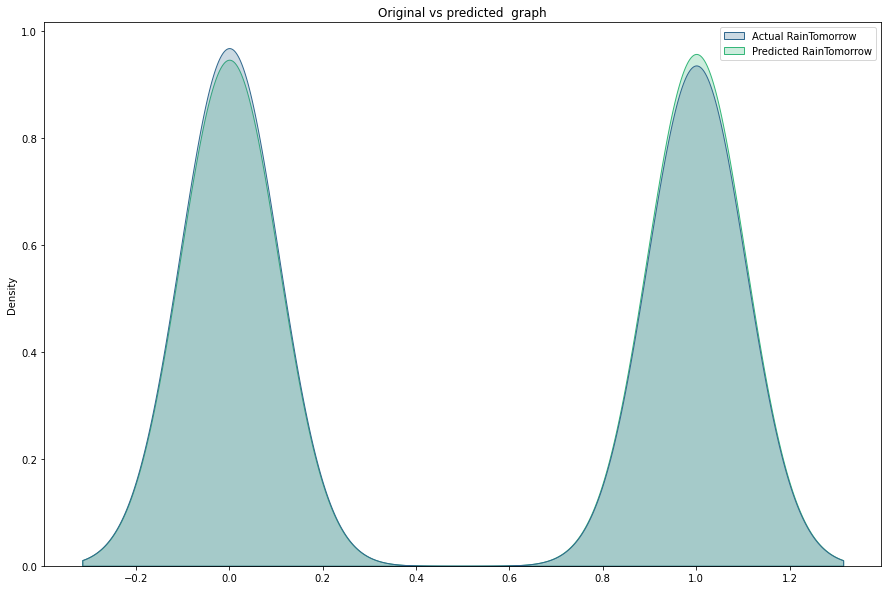

In [99]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = conclusion, palette = 'viridis', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()


# 2. PREDICTION FOR RAINFALL(REGRESSION PROBLEM)

In [118]:
#Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# SPLITTING THE DATA

In [101]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.9,0.773058,0.033069,0.068796,13.0,0.448790,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.1,-0.654231,0.033069,0.068796,14.0,0.448790,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.7,-0.654231,0.033069,0.068796,15.0,0.593637,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.0,-0.654231,0.033069,0.068796,4.0,-1.250093,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.3,1.135607,0.033069,0.068796,13.0,0.224831,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008


In [102]:
x = df1.drop('Rainfall', axis = 1)
y = df1['Rainfall']

In [103]:
x.shape

(7987, 24)

In [104]:
y.shape

(7987,)

In [106]:
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x.head(2)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.033069,0.068796,1.229267,0.44879,1.250245,1.400214,0.785250,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.033069,0.068796,1.441960,0.44879,-0.277857,1.626597,-0.982717,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315


<AxesSubplot:>

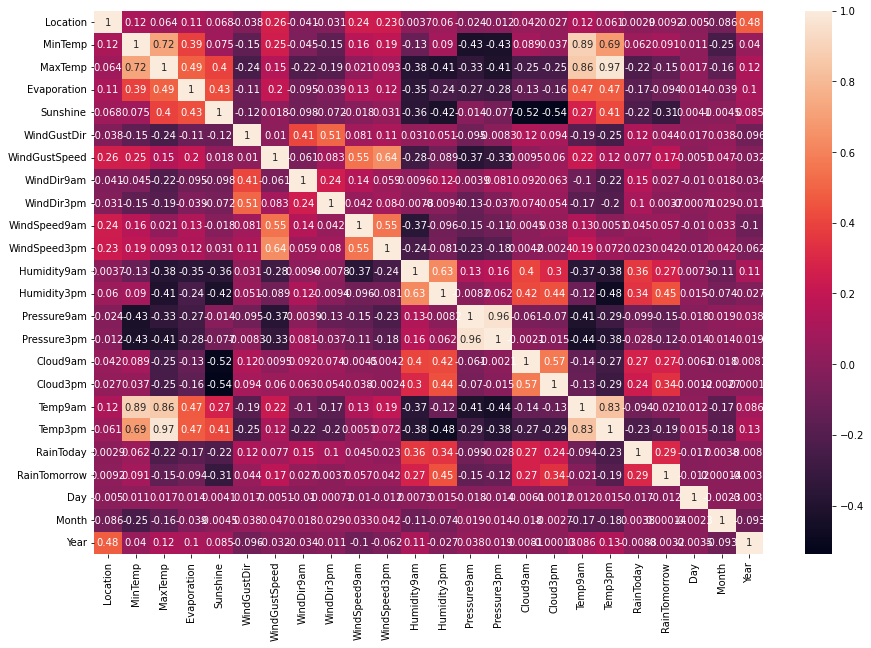

In [109]:
plt.figure(figsize=(15,10))
sns.heatmap(x.corr(),annot=True)

# checking multicollinearity

In [110]:
# Checking VIF 
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.601767,Location
1,8.843007,MinTemp
2,26.357127,MaxTemp
3,1.650941,Evaporation
4,2.040161,Sunshine
5,1.615743,WindGustDir
6,2.375642,WindGustSpeed
7,1.362169,WindDir9am
8,1.488530,WindDir3pm
9,1.998460,WindSpeed9am


In [113]:
#Droping Temp3pm
x = x.drop(columns=['Temp3pm','Temp9am', 'Pressure9am','MaxTemp'], axis = 1)

In [114]:
# Checking VIF after removing Temp9am and Pressure9am
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.598766,Location
1,1.709902,MinTemp
2,1.623137,Evaporation
3,1.971655,Sunshine
4,1.594758,WindGustDir
5,2.289499,WindGustSpeed
6,1.308696,WindDir9am
7,1.413856,WindDir3pm
8,1.917946,WindSpeed9am
9,1.947790,WindSpeed3pm


muticollinearity problem has been resolved

In [116]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head(2)

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,0.033069,0.068796,1.229267,0.44879,1.250245,1.400214,0.785250,0.638072,0.184123,-1.624174,-1.398115,1.425345,0.013138,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.033069,0.068796,1.441960,0.44879,-0.277857,1.626597,-0.982717,0.421555,-1.455097,-1.457752,-1.279988,0.011773,0.013138,-0.542476,-0.543635,-1.557976,1.634113,-1.661315


In [120]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('#' * 70,'\n')

At random state  2 The model performance very well
At random state:  2
Test R2 score is:  0.88
Train R2 score is:  0.88
###################################################################### 

At random state  4 The model performance very well
At random state:  4
Test R2 score is:  0.88
Train R2 score is:  0.88
###################################################################### 

At random state  10 The model performance very well
At random state:  10
Test R2 score is:  0.88
Train R2 score is:  0.88
###################################################################### 

At random state  11 The model performance very well
At random state:  11
Test R2 score is:  0.88
Train R2 score is:  0.88
###################################################################### 

At random state  14 The model performance very well
At random state:  14
Test R2 score is:  0.88
Train R2 score is:  0.88
###################################################################### 

At random state  15 The model

In [121]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state = 45,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [122]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [123]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, x, y, cv = 10).mean())
    print('#' * 70, '\n\n')

MAE of  LinearRegression() model 0.2223421967132859
MSE of LinearRegression() model 0.12248647286294305
RMSE of LinearRegression() model 0.3499806749849812
Training R2 Score of LinearRegression() model 88.14311238524117
Test R2 Score of LinearRegression() model 87.57110727983934
cross Validation score of  LinearRegression()  is  0.8774941170070827
###################################################################### 


MAE of  Ridge() model 0.22238978809961585
MSE of Ridge() model 0.12248405211672757
RMSE of Ridge() model 0.34997721656806113
Training R2 Score of Ridge() model 88.14311005413667
Test R2 Score of Ridge() model 87.57135291671916
cross Validation score of  Ridge()  is  0.8774937839075772
###################################################################### 


MAE of  Lasso() model 0.8631694328381586
MSE of Lasso() model 0.9855464624649146
RMSE of Lasso() model 0.9927469277035889
Training R2 Score of Lasso() model 0.0
Test R2 Score of Lasso() model -0.00493088258521901
cro

cross Validation score of  BaggingRegressor()  is  0.9013139964963932
###################################################################### 


MAE of  AdaBoostRegressor() model 0.3019989562948573
MSE of AdaBoostRegressor() model 0.14330995198381533
RMSE of AdaBoostRegressor() model 0.3785630092650566
Training R2 Score of AdaBoostRegressor() model 85.92954615854488
Test R2 Score of AdaBoostRegressor() model 85.4581164980456
cross Validation score of  AdaBoostRegressor()  is  0.8559800325437038
###################################################################### 


MAE of  GradientBoostingRegressor() model 0.2075702326259917
MSE of GradientBoostingRegressor() model 0.11360989552887757
RMSE of GradientBoostingRegressor() model 0.3370606703975971
Training R2 Score of GradientBoostingRegressor() model 90.00635177567735
Test R2 Score of GradientBoostingRegressor() model 88.47182737430039
cross Validation score of  GradientBoostingRegressor()  is  0.8857472966186567
#######################

# Best score has been provided by random forest regressor so will hypertune that model

In [124]:
#Let's tune the parameters using GridsearchCv
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 1, 2, 5],
          'max_features': [0.5, 1, 'auto', 'sqrt'],
          'min_samples_split': [2, 5, 10],
          }

gsv = GridSearchCV(RFR_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 5],
                         'max_features': [0.5, 1, 'auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='r2')

In [126]:
gsv.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [128]:
best_RFR_model = gsv.best_estimator_
GCV_pred = best_RFR_model.predict(x_test)
r2_score(y_test, GCV_pred)

0.9190764506180014

# model has been hypertuned and r2 score improved from to 92%

In [129]:
#Saving the best model to the local file system
import pickle
model_name1 = 'finalized_model.pickle'
pickle.dump(best_RFR_model, open('RFR_model', 'wb'))

In [131]:
#Loading saved model
loaded_model = pickle.load(open('RFR_model','rb'))

In [132]:
#Prediction using saved model
prediction = loaded_model.predict(x_test)
prediction

array([-0.62206248, -0.15036228, -0.65423115, ..., -0.59437689,
       -0.62397401, -0.65423115])

# model saves and predicted successfully

# ==============THANKYOU=======================